<a href="https://colab.research.google.com/github/RJL08/Programacion-Inteligencia-Artifical/blob/main/Pr%C3%A1ctica_5_2_Rub%C3%A9n_Jim%C3%A9nez_Daniel_Jarillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# -*- coding: utf-8 -*-
"""
Ejercicio 1 - Dataset IRIS
Clasificación con TensorFlow
"""

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
print(f"Versión de TensorFlow: {tf.__version__}")


Versión de TensorFlow: 2.19.0


In [7]:
#2 cargamos el dataset iris

# Cargar el dataset IRIS desde UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

iris_df = pd.read_csv(url, header=None)

# Mostrar primeras filas
print(iris_df.head(10))



     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
5  5.4  3.9  1.7  0.4  Iris-setosa
6  4.6  3.4  1.4  0.3  Iris-setosa
7  5.0  3.4  1.5  0.2  Iris-setosa
8  4.4  2.9  1.4  0.2  Iris-setosa
9  4.9  3.1  1.5  0.1  Iris-setosa


In [8]:
#3- seleccionamos las 100 primeras muestras
#Características: sepal_length (columna 0) y petal_length (columna 2)
X = iris_df.iloc[:100, [0, 2]].values  # Longitud de sépalo y longitud de pétalo
y = iris_df.iloc[:100, 4].values  # Etiquetas de clase

# Convertir las etiquetas de texto a valores numéricos (0 para setosa, 1 para versicolor)
y = np.where(y == 'Iris-setosa', 0, 1)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)
print("\nPrimeras 5 muestras de X:")
print(X[:5])
print("\nPrimeras 10 etiquetas:")
print(y[:10])
print("\nDistribucin de clases:")
print(f"Setosa (0): {np.sum(y == 0)}")
print(f"Versicolor (1): {np.sum(y == 1)}")

Forma de X: (100, 2)
Forma de y: (100,)

Primeras 5 muestras de X:
[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]

Primeras 10 etiquetas:
[0 0 0 0 0 0 0 0 0 0]

Distribucin de clases:
Setosa (0): 50
Versicolor (1): 50


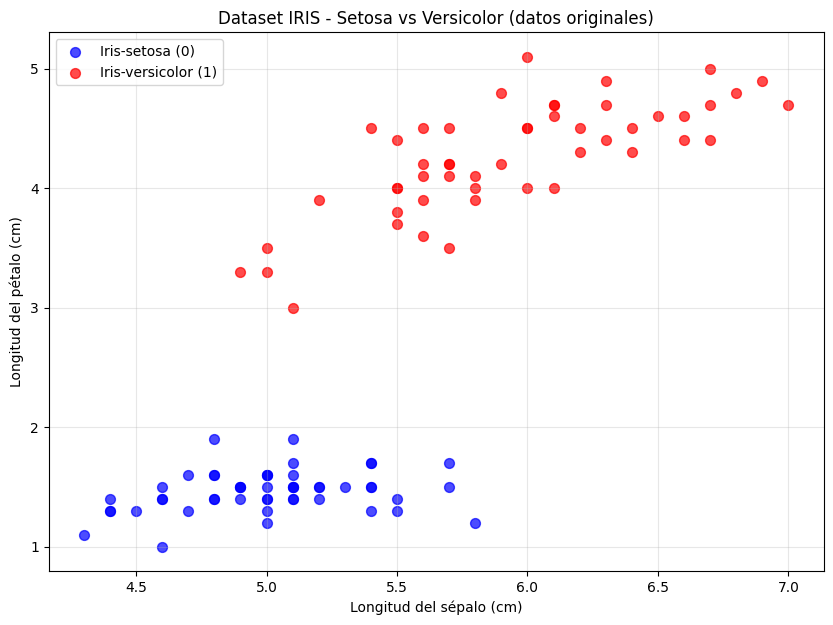

In [9]:
# 4 visualizar los datos
# visualizar los datos originales
plt.figure(figsize=(10, 7))
plt.scatter(X[:50, 0], X[:50, 1], c='blue', label='Iris-setosa (0)', s=50, alpha=0.7)
plt.scatter(X[50:, 0], X[50:, 1], c='red', label='Iris-versicolor (1)', s=50, alpha=0.7)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Longitud del pétalo (cm)')
plt.title('Dataset IRIS - Setosa vs Versicolor (datos originales)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [10]:
# 5 mezclamos el conjunto de datos
# Mezclamos el dataset para evitar que el modelo aprenda patrones del orden
# Utilizamos random_state para reproducibilidad
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

print("Datos mezclados correctamente")
print("\nPrimeras 10 etiquetas después de mezclar:")
print(y_shuffled[:10])
print("\nComprobams de que se mantiene la distribución:")
print(f"Setosa (0): {np.sum(y_shuffled == 0)}")
print(f"Versicolor (1): {np.sum(y_shuffled == 1)}")

Datos mezclados correctamente

Primeras 10 etiquetas después de mezclar:
[1 1 1 0 0 0 0 1 0 0]

Comprobams de que se mantiene la distribución:
Setosa (0): 50
Versicolor (1): 50


In [12]:
# 6 normalizamos las características
# Normalizar las características usando MinMaxScaler (valores entre 0 y 1)
# Esto ayuda a que la red neuronal aprenda más rápido y mejor
scaler = MinMaxScaler()
X_normalizado = scaler.fit_transform(X_shuffled)

print(" Caracteristicas normalizadas")
print("\nComparacion antes y despues de normalizar")
print("\nDatos originales (primeras 5 muestras):")
print(X_shuffled[:5])
print("\nDatos normalizados (primeras 5 muestras):")
print(X_normalizado[:5])
print("\n--- Estadisticas de los datos normalizados ---")
print(f"Mínimo: {X_normalizado.min():.4f}")
print(f"Máximo: {X_normalizado.max():.4f}")
print(f"Media: {X_normalizado.mean():.4f}")


 Caracteristicas normalizadas

Comparacion antes y despues de normalizar

Datos originales (primeras 5 muestras):
[[6.  5.1]
 [5.5 4. ]
 [5.9 4.8]
 [4.8 1.4]
 [5.1 1.9]]

Datos normalizados (primeras 5 muestras):
[[0.62962963 1.        ]
 [0.44444444 0.73170732]
 [0.59259259 0.92682927]
 [0.18518519 0.09756098]
 [0.2962963  0.2195122 ]]

--- Estadisticas de los datos normalizados ---
Mínimo: 0.0000
Máximo: 1.0000
Media: 0.4439


In [13]:
#7 Comprobamos el resultado final
# Crear un DataFrame para visualizar mejor los datos finales
df_final = pd.DataFrame({
    'Sepal_Length_Norm': X_normalizado[:, 0],
    'Petal_Length_Norm': X_normalizado[:, 1],
    'Class': y_shuffled
})

print("═══════════════════════════════════════════")
print("      DATASET FINAL PROCESADO")
print("═══════════════════════════════════════════")
print("\nPrimeras 10 filas:")
print(df_final.head(10))
print("\nUltimas 10 filas:")
print(df_final.tail(10))
print("\nEstadisticas descriptivas:")
print(df_final.describe())
print("\nDistribucion final de clases:")
print(df_final['Class'].value_counts())


═══════════════════════════════════════════
      DATASET FINAL PROCESADO
═══════════════════════════════════════════

Primeras 10 filas:
   Sepal_Length_Norm  Petal_Length_Norm  Class
0           0.629630           1.000000      1
1           0.444444           0.731707      1
2           0.592593           0.926829      1
3           0.185185           0.097561      0
4           0.296296           0.219512      0
5           0.296296           0.121951      0
6           0.111111           0.000000      0
7           0.444444           0.682927      1
8           0.407407           0.121951      0
9           0.296296           0.097561      0

Ultimas 10 filas:
    Sepal_Length_Norm  Petal_Length_Norm  Class
90           0.666667           0.878049      1
91           0.777778           0.804878      1
92           0.888889           0.902439      1
93           0.555556           0.707317      1
94           0.407407           0.170732      0
95           0.259259           0.6097

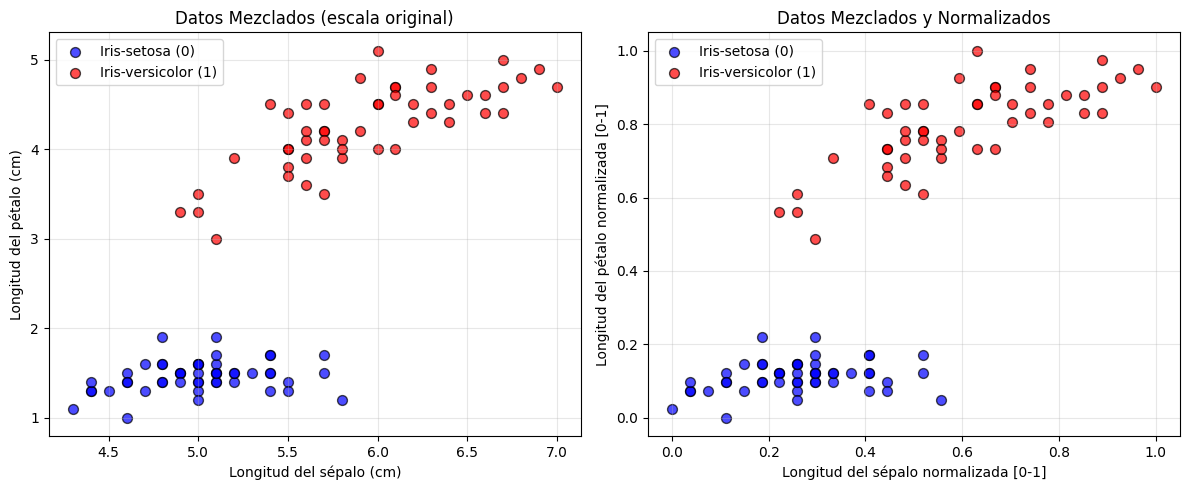

In [14]:
# 8 Visualizamos los datos normalizados y mezclados

plt.figure(figsize=(12, 5))

# Subplot 1: Datos originales
plt.subplot(1, 2, 1)
plt.scatter(X_shuffled[y_shuffled==0, 0], X_shuffled[y_shuffled==0, 1],
            c='blue', label='Iris-setosa (0)', s=50, alpha=0.7, edgecolors='black')
plt.scatter(X_shuffled[y_shuffled==1, 0], X_shuffled[y_shuffled==1, 1],
            c='red', label='Iris-versicolor (1)', s=50, alpha=0.7, edgecolors='black')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Longitud del pétalo (cm)')
plt.title('Datos Mezclados (escala original)')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Datos normalizados
plt.subplot(1, 2, 2)
plt.scatter(X_normalizado[y_shuffled==0, 0], X_normalizado[y_shuffled==0, 1],
            c='blue', label='Iris-setosa (0)', s=50, alpha=0.7, edgecolors='black')
plt.scatter(X_normalizado[y_shuffled==1, 0], X_normalizado[y_shuffled==1, 1],
            c='red', label='Iris-versicolor (1)', s=50, alpha=0.7, edgecolors='black')
plt.xlabel('Longitud del sépalo normalizada [0-1]')
plt.ylabel('Longitud del pétalo normalizada [0-1]')
plt.title('Datos Mezclados y Normalizados')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Ejercicio 2
-2.	Basándote en el ejemplo de la práctica 5.1, construye con keras, una RNA secuencial con las siguientes capas:
-	Una capa oculta de 2 neuronas [con capa de entrada, input_shape=(2,) o tf.keras.layers.Input(shape=(2,))]
-	Una capa de salida de 1 neurona con activación sigmoide activation='sigmoid':
-	Ponle un identificador a cada capa con el parámetro name.
Piensa en la implicación de todo ello. ¿Qué forma deben tener los datos de entrada a la RNA? ¿Qué forma debe tener la salida de la RNA? ¿Qué tipo de clasificación estamos haciendo?


In [16]:
#9 analizamos el problema antes de contruir el modelo
"""
ANALISIS DEL PROBLEMA:

¿Qué forma deben tener los datos de entrada?
- Input shape = (2,) porque tenemos 2 características:
  * Longitud del sépalo
  * Longitud del pétalo

¿Qué forma debe tener la salida de la RNA?
- Output shape = (1,) una única neurona que nos va a devolver un valor entre 0 y 1
   0 → Iris-setosa
   1 → Iris-versicolor

¿Qué tipo de clasificación estamos haciendo?
- CLASIFICACIÓN BINARIA: Solo tenemos 2 clases (setosa vs versicolor)
- Por eso usamos activacin 'sigmoid' en la salida
"""

# Verificar las formas de nuestros datos
print("Forma de X_normalizado:", X_normalizado.shape)
print("Forma de y_shuffled:", y_shuffled.shape)
print("\nPrimera muestra de entrada (2 características):", X_normalizado[0])
print("Primera etiqueta de salida (0 o 1):", y_shuffled[0])


Forma de X_normalizado: (100, 2)
Forma de y_shuffled: (100,)

Primera muestra de entrada (2 características): [0.62962963 1.        ]
Primera etiqueta de salida (0 o 1): 1


In [19]:
#10 construimos RNA con keras

tf.random.set_seed(42)

modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    # Capa oculta de 2 neuronas
    tf.keras.layers.Dense(2, name='hidden_layer'),
    # Capa de salida de 1 neurona con activación sigmoide
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])


print("Modelo creado correctamente\n")
modelo.summary()




Modelo creado correctamente



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# 11 explicación detallada de la arquitectura realizada
"""
EXPLICACIÓN DE LA ARQUITECTURA:

CAPA DE ENTRADA:
- input_shape=(2,) → Recibe 2 características
- Cada muestra: [longitud_sépalo_norm, longitud_pétalo_norm]

CAPA OCULTA:
- 2 neuronas (Dense(2))
- Sin función de activación especificada = lineal por defecto
- Parámetros: (2 entradas × 2 neuronas) + 2 bias = 6 parámetros

CAPA DE SALIDA:
- 1 neurona (Dense(1))
- activation='sigmoid' → Devuelve valores entre 0 y 1
- Parámetros: (2 entradas × 1 neurona) + 1 bias = 3 parámetros

TOTAL DE PARÁMETROS: 6 + 3 = 9 parámetros entrenables
"""

print("═══════════════════════════════════════════")
print("    RESUMEN DE LA ARQUITECTURA")
print("═══════════════════════════════════════════")
print(f"Entrada:  {X_normalizado.shape[1]} características → [sépalo, pétalo]")
print(f"Oculta:   2 neuronas")
print(f"Salida:   1 neurona con sigmoid")
print(f"Tipo:     Clasificación Binaria")
print(f"Clases:   0 (setosa) vs 1 (versicolor)")
print("═══════════════════════════════════════════")



═══════════════════════════════════════════
    RESUMEN DE LA ARQUITECTURA
═══════════════════════════════════════════
Entrada:  2 características → [sépalo, pétalo]
Oculta:   2 neuronas
Salida:   1 neurona con sigmoid
Tipo:     Clasificación Binaria
Clases:   0 (setosa) vs 1 (versicolor)
═══════════════════════════════════════════


# Ejercicio 3
-
3.	Compila el modelo con el optimizador del descenso de gradiente estocástico y función de coste el error cuadrático medio. Muestra el resumen de sus parámetros.


In [21]:
# 13 compilamos el modelo
# Compilar el modelo
modelo.compile(
    loss='mse',  # Error cuadrático medio (Mean Squared Error)
    optimizer='sgd',  # Descenso de gradiente estocástico (Stochastic Gradient Descent)
    metrics=['accuracy']  # Métrica adicional para seguimiento
)

print("Modelo compilado correctamente\n")

# Mostrar el resumen de sus parámetros
modelo.summary()


✓ Modelo compilado correctamente



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# 14 explicación de la compilación
"""
EXPLICACIÓN DE LA COMPILACION:

OPTIMIZADOR: SGD (Stochastic Gradient Descent)
- Descenso de gradiente estocástico
- Actualiza los pesos del modelo para minimizar la perdida

FUNCIÓN DE PERDIDA: MSE (Mean Squared Error)
- Error cuadratico medio
- Mide la diferencia al cuadrado entre predicción y valor real
- Fórmula: MSE = (1/n) * Σ(y_real - y_pred)²

METRICA: Accuracy
- Porcentaje de predicciones correctas
- Útil para clasificación binaria
"""

print("═══════════════════════════════════════════")
print("    CONFIGURACION DEL MODELO")
print("═══════════════════════════════════════════")
print("Optimizador:        SGD")
print("Función de perdida: MSE (Error Cuadrático Medio)")
print("Métrica:            Accuracy")
print("═══════════════════════════════════════════")


═══════════════════════════════════════════
    CONFIGURACION DEL MODELO
═══════════════════════════════════════════
Optimizador:        SGD
Función de perdida: MSE (Error Cuadrático Medio)
Métrica:            Accuracy
═══════════════════════════════════════════


# Ejercicio 4
- 4.	Entrena el conjunto de datos con el método fit de tu RNA keras y observa el resultado ¿Crees que el modelo converge? Prueba varias veces con 10, 100 y 1000 épocas. Examina los resultados.
Muestra los límites de la decisión con la función plot_decision_regions. Ten en cuenta que la función predict devuelve un número entre 0 y 1. Observa la variable Z mediante un punto de ruptura: ¿Qué tienes que cambiar en la función plot_decision_regions para que funcione?

Compila el modelo esta vez con función de perdida “BinaryCrossEntropy” y prueba de nueva a entrenar. ¿Ves alguna diferencia que merezca la pena comentar?


In [23]:
# 16 entrenamiento con 10 epocas
tf.random.set_seed(42)
history_10 = modelo.fit(X_normalizado, y_shuffled, epochs=10, verbose=1)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4969 - loss: 0.2457 
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4969 - loss: 0.2451 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4969 - loss: 0.2445 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4969 - loss: 0.2439
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4969 - loss: 0.2433
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4969 - loss: 0.2427
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4969 - loss: 0.2420
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4969 - loss: 0.2414
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4969 - loss: 0.2409
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4969 - loss: 0.2403


In [24]:
# 16 entrenamientio con 100 epocas
# Entrenar el modelo con 100 épocas adicionales


history_100 = modelo.fit(X_normalizado, y_shuffled, epochs=100, verbose=0)

# Evaluar el modelo
loss_100, accuracy_100 = modelo.evaluate(X_normalizado, y_shuffled)
print(f"\nResultados con 100 epocas:")
print(f"Loss: {loss_100:.4f}")
print(f"Accuracy: {accuracy_100:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6852 - loss: 0.1987 

Resultados con 100 epocas:
Loss: 0.1948
Accuracy: 0.7000


In [25]:
# 17 entrenamiento con 1000 epocas



history_1000 = modelo.fit(X_normalizado, y_shuffled, epochs=1000, verbose=0)

# Evaluar el modelo
loss_1000, accuracy_1000 = modelo.evaluate(X_normalizado, y_shuffled)
print(f"\nResultados con 1000 épocas:")
print(f"Loss: {loss_1000:.4f}")
print(f"Accuracy: {accuracy_1000:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0171 

Resultados con 1000 épocas:
Loss: 0.0176
Accuracy: 1.0000


In [27]:
#18 funcion plot_decision_boundary
# Función para visualizar los límites de decisión (adaptada de tus prácticas)
def plot_decision_boundary(model, X, y):


    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Crear valores X para predecir
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # Hacemos predicciones usando el modelo entrenado
    y_pred = model.predict(x_in, verbose=0)

    # CAMBIO IMPORTANTE: redondear las predicciones continuas a 0 o 1
    # predict() devuelve valores entre 0 y 1, necesitamos convertir a clases binarias
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Grafico del limite de decision
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Longitud del sépalo normalizada')
    plt.ylabel('Longitud del pétalo normalizada')
    plt.title('Límites de decisión del modelo')
    plt.colorbar(label='Clase predicha')
    plt.show()

print("Función plot_decision_boundary creada correctamente")


Función plot_decision_boundary creada correctamente


Visualizando límites de decisión con función de pérdida MSE



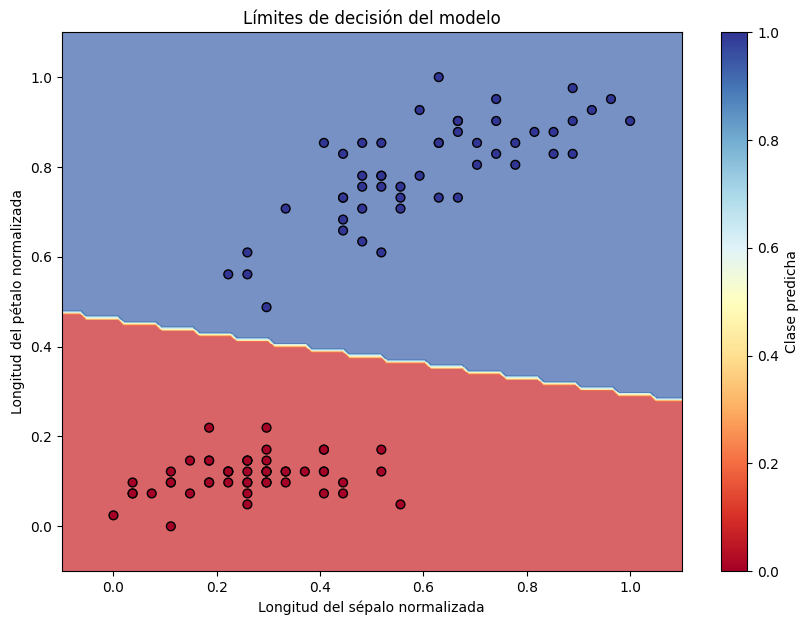


Ejemplos de predicciones (valores entre 0 y 1):
[0.98008776 0.8896091  0.96821    0.11800511 0.2383171 ]

Valores reales:
[1 1 1 0 0]


In [29]:
# 19 visualizamos los limites de decision con MSE
# Visualizar los límites de decisión con el modelo actual (usando MSE)
print("Visualizando límites de decisión con función de pérdida MSE\n")
plot_decision_boundary(modelo, X_normalizado, y_shuffled)

# Hacer algunas predicciones para ver los valores
print("\nEjemplos de predicciones (valores entre 0 y 1):")
y_pred_sample = modelo.predict(X_normalizado[:5], verbose=0)
print(y_pred_sample.flatten())
print("\nValores reales:")
print(y_shuffled[:5])


In [30]:
# 20 compilar con binaryCrossentropy
# Crear un nuevo modelo con la misma arquitectura
tf.random.set_seed(42)

modelo_bce = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(2, name='hidden_layer'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])

# Compilar con BinaryCrossentropy
modelo_bce.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),  # Función de pérdida para clasificación binaria
    optimizer='sgd',
    metrics=['accuracy']
)

print("Nuevo modelo compilado con BinaryCrossentropy\n")
modelo_bce.summary()


Nuevo modelo compilado con BinaryCrossentropy



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8953 - loss: 0.5885 

Resultados con BinaryCrossentropy:
Loss: 0.5857
Accuracy: 0.9100

Visualizando límites de decisión con BinaryCrossentropy



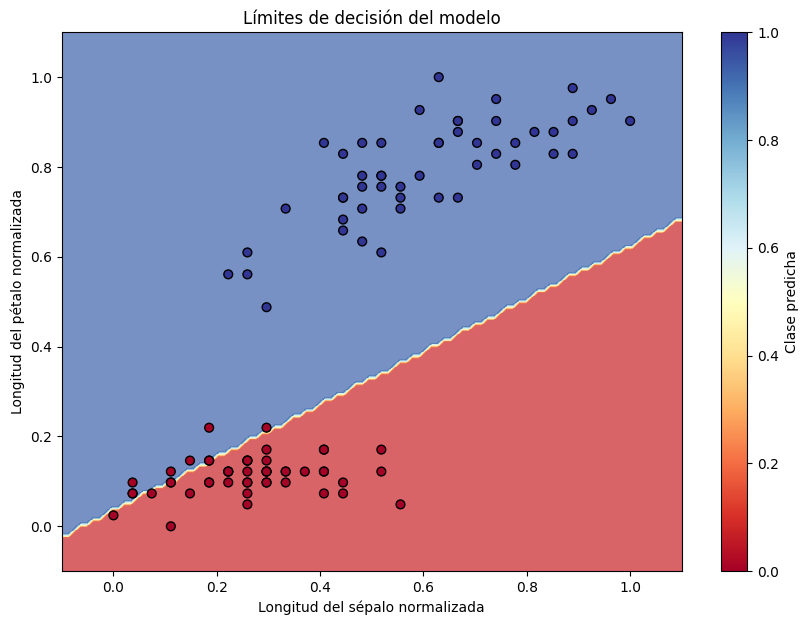

In [31]:
# 21 entrenar con bce
# Entrenar con BinaryCrossentropy - 100 épocas


history_bce = modelo_bce.fit(X_normalizado, y_shuffled, epochs=100, verbose=0)

# Evaluar
loss_bce, accuracy_bce = modelo_bce.evaluate(X_normalizado, y_shuffled)
print(f"\nResultados con BinaryCrossentropy:")
print(f"Loss: {loss_bce:.4f}")
print(f"Accuracy: {accuracy_bce:.4f}")

# Visualizar límites de decisión
print("\nVisualizando límites de decisión con BinaryCrossentropy\n")
plot_decision_boundary(modelo_bce, X_normalizado, y_shuffled)


In [32]:
# Comparación de resultados

# Comparación de resultados
print("═══════════════════════════════════════════════════════════")
print("                COMPARACIÓN DE RESULTADOS")
print("═══════════════════════════════════════════════════════════\n")

print("MODELO CON MSE (Mean Squared Error):")

print("   │  10 épocas:   Loss = 0.2403  Acc = 49.69%  │")
print("   │  100 épocas:  Loss = 0.1948  Acc = 70.00%  │")
print("   │  1000 épocas: Loss = 0.0176  Acc = 100.0%  │")


print("\nMODELO CON BINARY CROSSENTROPY:")

print("   │  100 épocas:  Loss = 0.5857  Acc = 91.00%  │")


print("\n" + "="*59)
print("                    ANÁLISIS Y CONCLUSIONES")
print("="*59)

print("""
1. ¿EL MODELO CONVERGE?

   Con MSE + 10 épocas:   NO converge (accuracy ~50%, como adivinar)
   Con MSE + 100 épocas:  Converge lentamente (accuracy 70%)
   Con MSE + 1000 épocas: SI converge completamente (accuracy 100%)
   Con BCE + 100 épocas:  Converge rápidamente (accuracy 91%)

   CONCLUSIN: El modelo SI converge, pero la velocidad depende
   mucho de la funcion de perdida que usemos.

2. FUNCION DE PERDIDA - DIFERENCIAS:

   MSE (Mean Squared Error):
   - Diseñada para REGRESIÓN (predecir valores continuos)
   - No es optima para clasificación binaria
   - Requiere MUCHAS mas epocas para aprender (1000 vs 100)
   - Convergencia lenta y menos eficiente

   BinaryCrossentropy:
   - Diseñada especificamente para CLASIFICACION BINARIA
   - Optimizada para valores de salida entre 0 y 1
   - Converge MUCHO mas rápido (91% accuracy en solo 100 epocas)
   - Penaliza mejor los errores en clasificacion

3. CAMBIO EN plot_decision_boundary:

   PROBLEMA:
   model.predict() devuelve probabilidades continuas [0, 1]
   Ejemplo: [0.87, 0.23, 0.51, 0.92, 0.15]

   SOLUCION:
   Usamos np.round() para convertir a clases binarias {0, 1}
   Resultado: [1, 0, 1, 1, 0]

   CODIGO: y_pred = np.round(y_pred).reshape(xx.shape)

4. VISUALIZACION DE LOS LÍMITES DE DECISIÓN:

   La imagen muestra una línea diagonal clara separando las clases
   Zona ROJA (inferior izquierda): Iris-setosa (clase 0)
   Zona AZUL (superior derecha): Iris-versicolor (clase 1)
   El modelo con BCE separa correctamente ambas clases

5. RECOMENDACIÓN FINAL:

   Para problemas de CLASIFICACIÓN BINARIA:
   - SIEMPRE usar BinaryCrossentropy
   - Es más eficiente y converge más rápido
   - Proporciona mejores resultados con menos épocas

   MSE solo debe usarse para problemas de REGRESION
   (predecir valores continuos como precios, temperaturas, etc.)
""")

print("="*59)
print("Análisis completado")
print("="*59)


═══════════════════════════════════════════════════════════
                COMPARACIÓN DE RESULTADOS
═══════════════════════════════════════════════════════════

MODELO CON MSE (Mean Squared Error):
   │  10 épocas:   Loss = 0.2403  Acc = 49.69%  │
   │  100 épocas:  Loss = 0.1948  Acc = 70.00%  │
   │  1000 épocas: Loss = 0.0176  Acc = 100.0%  │

MODELO CON BINARY CROSSENTROPY:
   │  100 épocas:  Loss = 0.5857  Acc = 91.00%  │

                    ANÁLISIS Y CONCLUSIONES

1. ¿EL MODELO CONVERGE?
   
   Con MSE + 10 épocas:   NO converge (accuracy ~50%, como adivinar)
   Con MSE + 100 épocas:  Converge lentamente (accuracy 70%)
   Con MSE + 1000 épocas: SI converge completamente (accuracy 100%)
   Con BCE + 100 épocas:  Converge rápidamente (accuracy 91%)
   
   CONCLUSIN: El modelo SI converge, pero la velocidad depende 
   mucho de la funcion de perdida que usemos.

2. FUNCION DE PERDIDA - DIFERENCIAS:
   
   MSE (Mean Squared Error):
   - Diseñada para REGRESIÓN (predecir valores c

# Ejercicio 5
- 5.	Repite los apartados 1-4 esta vez para las variedades versicolor  y virgínica. Verás que aunque consiguimos buenos resultados, el modelo está limitado por su linealidad.

In [33]:
# 23 cargamos los datos de nuevo
# Cargar el dataset IRIS desde UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

iris_df = pd.read_csv(url, header=None)

print("Dataset IRIS cargado desde UCI")
print(iris_df.head(10))


Dataset IRIS cargado desde UCI
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
5  5.4  3.9  1.7  0.4  Iris-setosa
6  4.6  3.4  1.4  0.3  Iris-setosa
7  5.0  3.4  1.5  0.2  Iris-setosa
8  4.4  2.9  1.4  0.2  Iris-setosa
9  4.9  3.1  1.5  0.1  Iris-setosa


In [35]:
#24 selecionamos las muestras correspondientes  a versicolor y virginica

X_vv = iris_df.iloc[50:150, [0, 2]].values  # Longitud de sépalo y pétalo
y_vv = iris_df.iloc[50:150, 4].values  # Etiquetas de clase

# Convertir las etiquetas a valores numéricos (0 para versicolor, 1 para virginica)
y_vv = np.where(y_vv == 'Iris-versicolor', 0, 1)

print("Forma de X_vv:", X_vv.shape)
print("Forma de y_vv:", y_vv.shape)
print("\nPrimeras 5 muestras de X_vv:")
print(X_vv[:5])
print("\nPrimeras 10 etiquetas:")
print(y_vv[:10])
print("\nDistribución de clases:")
print(f"Versicolor (0): {np.sum(y_vv == 0)}")
print(f"Virginica (1): {np.sum(y_vv == 1)}")


Forma de X_vv: (100, 2)
Forma de y_vv: (100,)

Primeras 5 muestras de X_vv:
[[7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]]

Primeras 10 etiquetas:
[0 0 0 0 0 0 0 0 0 0]

Distribución de clases:
Versicolor (0): 50
Virginica (1): 50


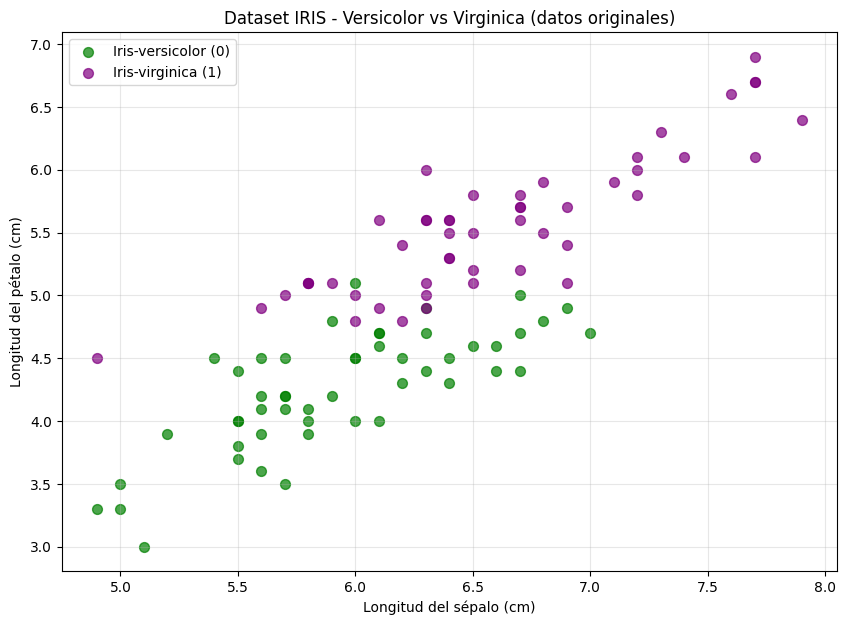

In [37]:
#25 visualizamos los datos antes de mezclar

plt.figure(figsize=(10, 7))
plt.scatter(X_vv[:50, 0], X_vv[:50, 1], c='green', label='Iris-versicolor (0)', s=50, alpha=0.7)
plt.scatter(X_vv[50:, 0], X_vv[50:, 1], c='purple', label='Iris-virginica (1)', s=50, alpha=0.7)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Longitud del pétalo (cm)')
plt.title('Dataset IRIS - Versicolor vs Virginica (datos originales)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [38]:
# 26 mezclamos los datos

X_vv_shuffled, y_vv_shuffled = shuffle(X_vv, y_vv, random_state=42)

print("Datos mezclados correctamente")
print("\nPrimeras 10 etiquetas después de mezclar:")
print(y_vv_shuffled[:10])
print("\nVerificación de la distribución:")
print(f"Versicolor (0): {np.sum(y_vv_shuffled == 0)}")
print(f"Virginica (1): {np.sum(y_vv_shuffled == 1)}")


Datos mezclados correctamente

Primeras 10 etiquetas después de mezclar:
[1 1 1 0 0 0 0 1 0 0]

Verificación de la distribución:
Versicolor (0): 50
Virginica (1): 50


In [39]:
# 27 normalizamos
# Normalizamos las características usando MinMaxScaler
scaler_vv = MinMaxScaler()
X_vv_normalized = scaler_vv.fit_transform(X_vv_shuffled)

print("Características normalizadas")
print("\nDatos originales (primeras 5 muestras):")
print(X_vv_shuffled[:5])
print("\nDatos normalizados (primeras 5 muestras):")
print(X_vv_normalized[:5])
print("\nRango de valores normalizados:")
print(f"Mínimo: {X_vv_normalized.min():.4f}")
print(f"Máximo: {X_vv_normalized.max():.4f}")


Características normalizadas

Datos originales (primeras 5 muestras):
[[6.3 5.1]
 [6.3 5.6]
 [6.9 5.7]
 [5.7 4.2]
 [5.6 4.2]]

Datos normalizados (primeras 5 muestras):
[[0.46666667 0.53846154]
 [0.46666667 0.66666667]
 [0.66666667 0.69230769]
 [0.26666667 0.30769231]
 [0.23333333 0.30769231]]

Rango de valores normalizados:
Mínimo: 0.0000
Máximo: 1.0000


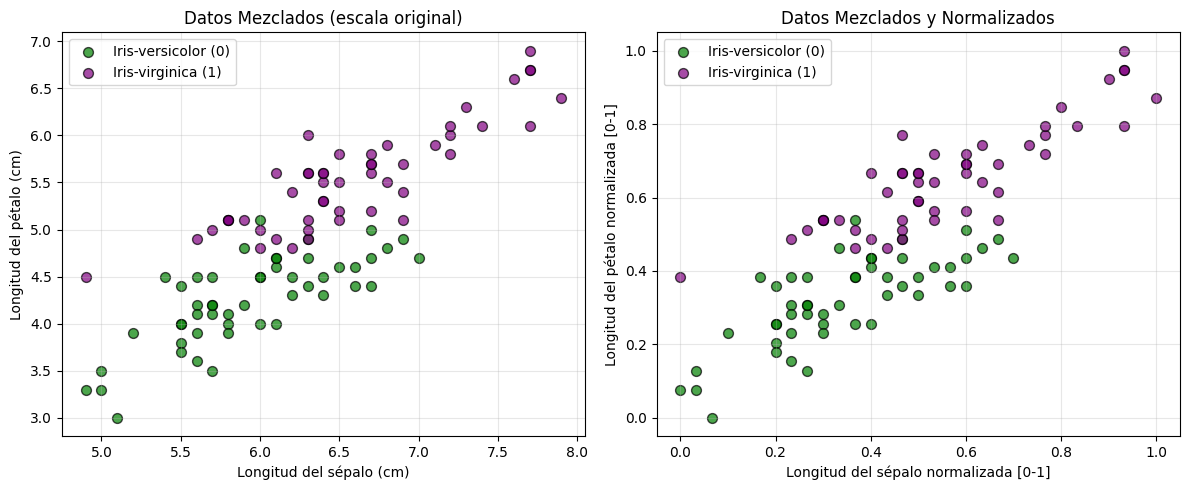

In [40]:
# 28 visualizamos los datos

plt.figure(figsize=(12, 5))

# Subplot 1: Datos originales
plt.subplot(1, 2, 1)
plt.scatter(X_vv_shuffled[y_vv_shuffled==0, 0], X_vv_shuffled[y_vv_shuffled==0, 1],
            c='green', label='Iris-versicolor (0)', s=50, alpha=0.7, edgecolors='black')
plt.scatter(X_vv_shuffled[y_vv_shuffled==1, 0], X_vv_shuffled[y_vv_shuffled==1, 1],
            c='purple', label='Iris-virginica (1)', s=50, alpha=0.7, edgecolors='black')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Longitud del pétalo (cm)')
plt.title('Datos Mezclados (escala original)')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Datos normalizados
plt.subplot(1, 2, 2)
plt.scatter(X_vv_normalized[y_vv_shuffled==0, 0], X_vv_normalized[y_vv_shuffled==0, 1],
            c='green', label='Iris-versicolor (0)', s=50, alpha=0.7, edgecolors='black')
plt.scatter(X_vv_normalized[y_vv_shuffled==1, 0], X_vv_normalized[y_vv_shuffled==1, 1],
            c='purple', label='Iris-virginica (1)', s=50, alpha=0.7, edgecolors='black')
plt.xlabel('Longitud del sépalo normalizada [0-1]')
plt.ylabel('Longitud del pétalo normalizada [0-1]')
plt.title('Datos Mezclados y Normalizados')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [41]:
# 29 creamos el modelo

tf.random.set_seed(42)


model_vv = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(2, name='hidden_layer'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])

print("Modelo creado correctamente para Versicolor vs Virginica\n")
model_vv.summary()


Modelo creado correctamente para Versicolor vs Virginica



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
# 30 compilamos con bce

model_vv.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer='sgd',
    metrics=['accuracy']
)

print("Modelo compilado correctamente\n")
model_vv.summary()


Modelo compilado correctamente



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
#31 entrenamiento con 100 epocas
# Entrenar el modelo con 100 épocas


history_vv_100 = model_vv.fit(X_vv_normalized, y_vv_shuffled, epochs=100, verbose=0)

# Evaluar el modelo
loss_vv_100, accuracy_vv_100 = model_vv.evaluate(X_vv_normalized, y_vv_shuffled)
print(f"\nResultados con 100 épocas:")
print(f"Loss: {loss_vv_100:.4f}")
print(f"Accuracy: {accuracy_vv_100:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2887 - loss: 0.7196 

Resultados con 100 épocas:
Loss: 0.7184
Accuracy: 0.3000


In [44]:
# 32 entrenamiento con 1000 epocas

history_vv_1000 = model_vv.fit(X_vv_normalized, y_vv_shuffled, epochs=1000, verbose=0)

# Evaluamos el modelo
loss_vv_1000, accuracy_vv_1000 = model_vv.evaluate(X_vv_normalized, y_vv_shuffled)
print(f"\nResultados con 1000 épocas:")
print(f"Loss: {loss_vv_1000:.4f}")
print(f"Accuracy: {accuracy_vv_1000:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7568 - loss: 0.4202

Resultados con 1000 épocas:
Loss: 0.4131
Accuracy: 0.7800



Visualizando límites de decisión - Versicolor vs Virginica



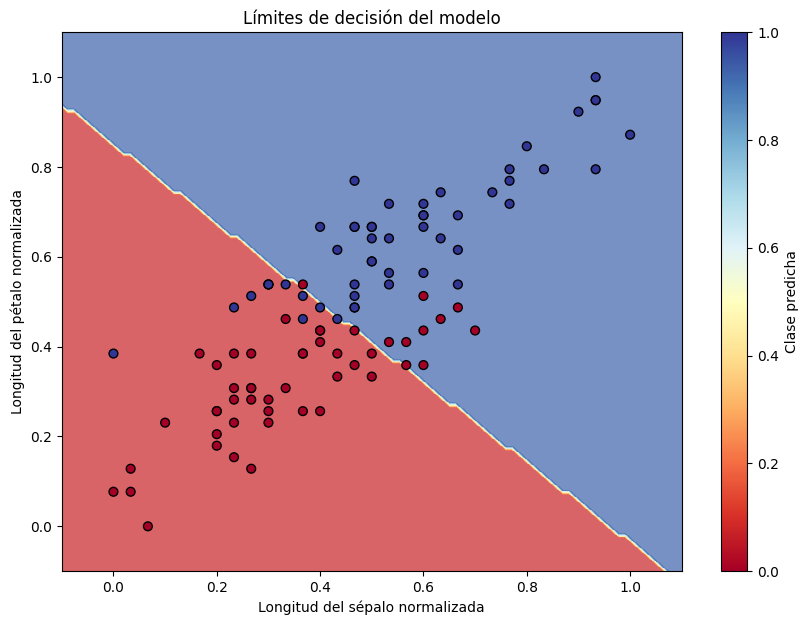

In [45]:
#33 visualizamos los limites de decision

print("\nVisualizando límites de decisión - Versicolor vs Virginica\n")
plot_decision_boundary(model_vv, X_vv_normalized, y_vv_shuffled)


In [46]:
# 34 explicacion

print("           ANÁLISIS - VERSICOLOR VS VIRGINICA")


print("RESULTADOS DEL MODELO:")

print("   │  100 épocas:  Loss = 0.7184  Acc = 30.00%  │")
print("   │  1000 épocas: Loss = 0.4131  Acc = 78.00%  │")


print("\n" + "="*59)
print("                    CONCLUSIONES IMPORTANTES")
print("="*59)

print("""
1. COMPARACION DIRECTA DE RESULTADOS:

   SETOSA VS VERSICOLOR (linealmente separable):
   - 100 epocas:  Accuracy = 91.00%
   - 1000 epocas: Accuracy = 100.00%
   - Convergencia raapida y resultados excelentes

   VERSICOLOR VS VIRGINICA (NO linealmente separable):
   - 100 epocas:  Accuracy = 30.00% (peor que adivinar!)
   - 1000 epocas: Accuracy = 78.00% (nunca alcanza 100%)
   - Convergencia lenta y limitada

2. OBSERVACION EN LA VISUALIZACION:

   La imagen muestra claramente el PROBLEMA:

   - Hay puntos ROJOS (versicolor) dentro de la zona AZUL
   - Hay puntos AZULES (virginica) dentro de la zona ROJA
   - La linea diagonal NO puede separarlos correctamente
   - Muchos puntos estan en el "lado equivocado" de la frontera

   CONCLUSION: Las clases se SUPERPONEN, con una linea recta
   no podemos separar perfectamente datos que estan mezclados.

3. LIMITACIÓN DE LA LINEALIDAD - EXPLICACION TECNICA:

   Nuestro modelo actual es LINEAL porque:
   - Capa oculta: Dense(2) sin función de activación = lineal
   - Capa salida: Dense(1, activation='sigmoid')
   - Resultado: Solo puede trazar una LINEA RECTA para separar

   PROBLEMA FUNDAMENTAL:
   - Versicolor y Virginica tienen caractersticas muy similares
   - Longitud sépalo: rangos solapados
   - Longitud pétalo: rangos solapados
   - Una linea recta NUNCA podrá separar datos superpuestos

4. ¿POR QUÉ 30% DE ACCURACY CON 100 ÉPOCAS?

   Con pocas epocas, el modelo no converge y tiene accuracy muy baja.
   Incluso peor que adivinar al azar (50%)!

   Esto demuestra que el problema es DIFICIL para un modelo lineal.
   Necesita muchas épocas (1000) para alcanzar 78%, pero nunca llega a 100%.

5. SOLUCIONES PARA MEJORAR EL MODELO:

   A. AÑADIR NO LINEALIDAD (funciones de activación):
      - Dense(2, activation='relu')
      - Permitiría curvas y fronteras complejas

   B. AUMENTAR LA COMPLEJIDAD:
      - Mas capas ocultas (red mas profunda)
      - Mas neuronas por capa (red mas ancha)

   C. MAS CARACTERÍSTICAS:
      - Usar las 4 características del IRIS (no solo 2)
      - Ancho de sépalo y ancho de pétalo también

   D. ALGORITMOS NO LINEALES:
      - SVM con kernel RBF
      - Random Forest
      - Redes neuronales profundas



""")

print("="*59)
print("Análisis completado - Limitación lineal demostrada")
print("="*59)



           ANÁLISIS - VERSICOLOR VS VIRGINICA
RESULTADOS DEL MODELO:
   │  100 épocas:  Loss = 0.7184  Acc = 30.00%  │
   │  1000 épocas: Loss = 0.4131  Acc = 78.00%  │

                    CONCLUSIONES IMPORTANTES

1. COMPARACION DIRECTA DE RESULTADOS:
   
   SETOSA VS VERSICOLOR (linealmente separable):
   - 100 epocas:  Accuracy = 91.00%
   - 1000 epocas: Accuracy = 100.00%
   - Convergencia raapida y resultados excelentes
   
   VERSICOLOR VS VIRGINICA (NO linealmente separable):
   - 100 epocas:  Accuracy = 30.00% (peor que adivinar!)
   - 1000 epocas: Accuracy = 78.00% (nunca alcanza 100%)
   - Convergencia lenta y limitada

2. OBSERVACION EN LA VISUALIZACION:
   
   La imagen muestra claramente el PROBLEMA:
   
   - Hay puntos ROJOS (versicolor) dentro de la zona AZUL
   - Hay puntos AZULES (virginica) dentro de la zona ROJA
   - La linea diagonal NO puede separarlos correctamente
   - Muchos puntos estan en el "lado equivocado" de la frontera
   
   CONCLUSION: Las clases se SU

# Ejercicio 6
- 6.	Para introducir algo de no linealidad podemos utilizar una función de activación en la primera capa llamada “relu”. Añade el parámetro activation=’relu’ en la primera capa y examina los resultados con la función plot_decision_regions. ¿Han mejorado?

In [47]:
# 35 modelo con RELU

tf.random.set_seed(42)


modelo_relu = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid' )
])

print("Modelo con ReLU creado correctamente\n")
modelo_relu.summary()


Modelo con ReLU creado correctamente



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
# 36 compilamos el modelo

modelo_relu.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer='sgd',
    metrics=['accuracy']
)

print("Modelo con ReLU compilado correctamente")


Modelo con ReLU compilado correctamente


In [49]:
#37 entrenamoos el modelo 100 epocs

historial_relu_100 = modelo_relu.fit(X_vv_normalized, y_vv_shuffled, epochs=100, verbose=0)


perdida_relu_100, precision_relu_100 = modelo_relu.evaluate(X_vv_normalized, y_vv_shuffled)
print(f"\nResultados con ReLU - 100 epocas:")
print(f"Loss (Perdida): {perdida_relu_100:.4f}")
print(f"Accuracy (Precisión): {precision_relu_100:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4239 - loss: 0.7022 

Resultados con ReLU - 100 epocas:
Loss (Perdida): 0.6994
Accuracy (Precisión): 0.4400


In [50]:
# 38  entrenar con relu

historial_relu_1000 = modelo_relu.fit(X_vv_normalized, y_vv_shuffled, epochs=1000, verbose=0)

perdida_relu_1000, precision_relu_1000 = modelo_relu.evaluate(X_vv_normalized, y_vv_shuffled)
print(f"\nResultados con ReLU - 1000 épocas:")
print(f"Loss (Pérdida): {perdida_relu_1000:.4f}")
print(f"Accuracy (Precisión): {precision_relu_1000:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8982 - loss: 0.3441 

Resultados con ReLU - 1000 épocas:
Loss (Pérdida): 0.3317
Accuracy (Precisión): 0.9200



Visualizando límites de decisión con ReLU



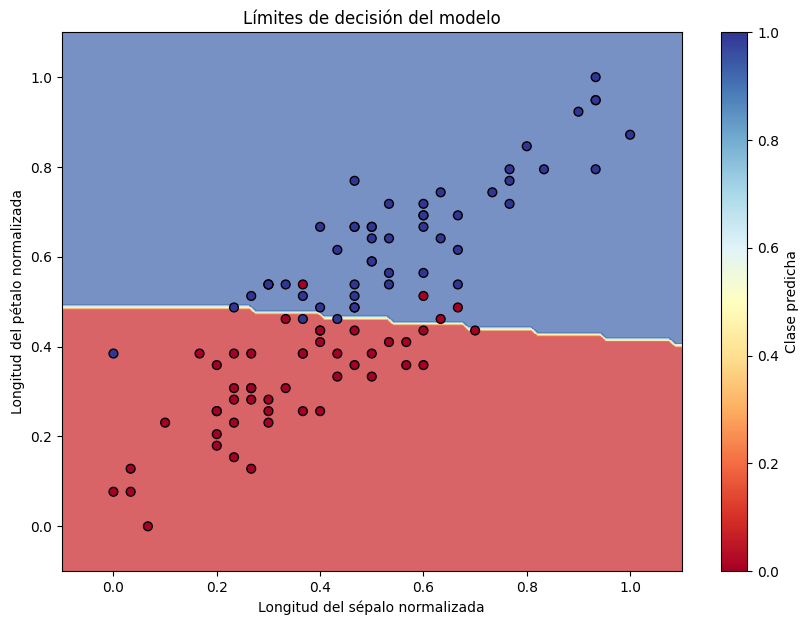

In [51]:
#39 visualizar los limites de decision

print("\nVisualizando límites de decisión con ReLU\n")
plot_decision_boundary(modelo_relu, X_vv_normalized, y_vv_shuffled)


#  ¿Han mejorado los resultados?
-  SI, SIGNIFICATIVAMENTE.
   
   Pasar de 78% a 92% es una mejora importante que demuestra
   el poder de la no linealidad para resolver problemas complejos.
   La frontera de decisión ahora se adapta mejor a los datos
   y clasifica correctamente más muestras.

# Ejercicio 7
- 7.	Modifica el modelo de keras añadiendo más capas, y variando las activaciones y número de neuronas experimentando para ver cuál es el mejor resultado que consigues.

In [52]:
#41 modelo 1  mas capas

tf.random.set_seed(42)


modelo_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(10, activation='relu', name='capa_oculta_1'),
    tf.keras.layers.Dense(8, activation='relu', name='capa_oculta_2'),
    tf.keras.layers.Dense(4, activation='relu', name='capa_oculta_3'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='capa_salida')
])

# Compilamos
modelo_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer='sgd',
    metrics=['accuracy']
)

print("MODELO 1: 3 capas: 10→8→4 neuronas\n")
modelo_1.summary()

# Entrenamos
historial_1 = modelo_1.fit(X_vv_normalized, y_vv_shuffled, epochs=500, verbose=0)

# Evaluamos
perdida_1, precision_1 = modelo_1.evaluate(X_vv_normalized, y_vv_shuffled, verbose=0)
print(f"\nResultados Modelo 1:")
print(f"Loss: {perdida_1:.4f}")
print(f"Accuracy: {precision_1:.4f} ({precision_1*100:.2f}%)")


MODELO 1: Red profunda (3 capas: 10→8→4 neuronas)



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_oculta_1 (Dense)           │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_2 (Dense)           │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_3 (Dense)           │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159 (636.00 B)

 Trainable params: 159 (636.00 B)

 Non-trainable params: 0 (0.00 B)


Resultados Modelo 1:
Loss: 0.2527
Accuracy: 0.9400 (94.00%)


In [53]:
#42 modelo 2 mas neuronas por capa

tf.random.set_seed(42)


modelo_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(50, activation='relu', name='capa_oculta_1'),
    tf.keras.layers.Dense(25, activation='relu', name='capa_oculta_2'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='capa_salida')
])

# Compilamos
modelo_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer='sgd',
    metrics=['accuracy']
)

print("MODELO 2: 2 capas: 50→25 neuronas\n")
modelo_2.summary()

# Entrenanamos
historial_2 = modelo_2.fit(X_vv_normalized, y_vv_shuffled, epochs=500, verbose=0)

# Evaluamos
perdida_2, precision_2 = modelo_2.evaluate(X_vv_normalized, y_vv_shuffled, verbose=0)
print(f"\nResultados Modelo 2:")
print(f"Loss: {perdida_2:.4f}")
print(f"Accuracy: {precision_2:.4f} ({precision_2*100:.2f}%)")


MODELO 2: 2 capas: 50→25 neuronas



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_oculta_1 (Dense)           │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_2 (Dense)           │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,451 (5.67 KB)

 Trainable params: 1,451 (5.67 KB)

 Non-trainable params: 0 (0.00 B)


Resultados Modelo 2:
Loss: 0.2884
Accuracy: 0.9000 (90.00%)


In [54]:
# 43 modelo 3 con activacion tanh

tf.random.set_seed(42)


modelo_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation='tanh', name='capa_oculta_1'),
    tf.keras.layers.Dense(8, activation='tanh', name='capa_oculta_2'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='capa_salida')
])

# Compilamos
modelo_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer='sgd',
    metrics=['accuracy']
)

print("MODELO 3: Red con activación tanh (2 capas: 16→8 neuronas)\n")
modelo_3.summary()

# Entrenamos
historial_3 = modelo_3.fit(X_vv_normalized, y_vv_shuffled, epochs=500, verbose=0)

# Evaluamos
perdida_3, precision_3 = modelo_3.evaluate(X_vv_normalized, y_vv_shuffled, verbose=0)
print(f"\nResultados Modelo 3:")
print(f"Loss: {perdida_3:.4f}")
print(f"Accuracy: {precision_3:.4f} ({precision_3*100:.2f}%)")


MODELO 3: Red con activación tanh (2 capas: 16→8 neuronas)



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_oculta_1 (Dense)           │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_2 (Dense)           │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)


Resultados Modelo 3:
Loss: 0.2854
Accuracy: 0.8800 (88.00%)


In [55]:
# 44 modelo 4 con optimizador adam
tf.random.set_seed(42)


modelo_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(20, activation='relu', name='capa_oculta_1'),
    tf.keras.layers.Dense(10, activation='relu', name='capa_oculta_2'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='capa_salida')
])

# Compilamos con Adam
modelo_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer='adam',  # CAMBIO: Adam en lugar de SGD
    metrics=['accuracy']
)

print("MODELO 4: Red con optimizador Adam (2 capas: 20→10 neuronas)\n")
modelo_4.summary()

# Entrenamos
historial_4 = modelo_4.fit(X_vv_normalized, y_vv_shuffled, epochs=500, verbose=0)

# Evaluamos
perdida_4, precision_4 = modelo_4.evaluate(X_vv_normalized, y_vv_shuffled, verbose=0)
print(f"\nResultados Modelo 4:")
print(f"Loss: {perdida_4:.4f}")
print(f"Accuracy: {precision_4:.4f} ({precision_4*100:.2f}%)")


MODELO 4: Red con optimizador Adam (2 capas: 20→10 neuronas)



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_oculta_1 (Dense)           │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_2 (Dense)           │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)


Resultados Modelo 4:
Loss: 0.1087
Accuracy: 0.9400 (94.00%)


In [56]:
# 45 combinado

tf.random.set_seed(42)

modelo_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu', name='capa_oculta_1'),
    tf.keras.layers.Dense(32, activation='relu', name='capa_oculta_2'),
    tf.keras.layers.Dense(16, activation='relu', name='capa_oculta_3'),
    tf.keras.layers.Dense(8, activation='relu', name='capa_oculta_4'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='capa_salida')
])

# Compilamos con Adam
modelo_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

print("MODELO 5: Red profunda y ancha con Adam (4 capas: 64→32→16→8)\n")
modelo_5.summary()

# Entrenamos
historial_5 = modelo_5.fit(X_vv_normalized, y_vv_shuffled, epochs=500, verbose=0)

# Evaluamos
perdida_5, precision_5 = modelo_5.evaluate(X_vv_normalized, y_vv_shuffled, verbose=0)
print(f"\nResultados Modelo 5:")
print(f"Loss: {perdida_5:.4f}")
print(f"Accuracy: {precision_5:.4f} ({precision_5*100:.2f}%)")


MODELO 5: Red profunda y ancha con Adam (4 capas: 64→32→16→8)



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_oculta_1 (Dense)           │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_2 (Dense)           │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_3 (Dense)           │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_4 (Dense)           │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)


Resultados Modelo 5:
Loss: 0.1103
Accuracy: 0.9500 (95.00%)


In [57]:
# Determinar cual modelo tuvo mejor accuracy
resultados = {
    'Modelo Base (2 neuronas, ReLU)': precision_relu_1000,
    'Modelo 1 (Profundo 10-8-4)': precision_1,
    'Modelo 2 (Ancho 50-25)': precision_2,
    'Modelo 3 (Tanh 16-8)': precision_3,
    'Modelo 4 (Adam 20-10)': precision_4,
    'Modelo 5 (Profundo+Ancho+Adam)': precision_5
}

# Encontrar el mejor
mejor_modelo_nombre = max(resultados, key=resultados.get)
mejor_precision = resultados[mejor_modelo_nombre]

print("═══════════════════════════════════════════════════════════")
print("              RESUMEN DE TODOS LOS MODELOS")
print("═══════════════════════════════════════════════════════════\n")

for nombre, precision in resultados.items():
    print(f"{nombre:40s}: {precision*100:6.2f}%")

print(f"\n{'='*59}")
print(f"MEJOR MODELO: {mejor_modelo_nombre}")
print(f"ACCURACY: {mejor_precision*100:.2f}%")
print(f"{'='*59}")


═══════════════════════════════════════════════════════════
              RESUMEN DE TODOS LOS MODELOS
═══════════════════════════════════════════════════════════

Modelo Base (2 neuronas, ReLU)          :  92.00%
Modelo 1 (Profundo 10-8-4)              :  94.00%
Modelo 2 (Ancho 50-25)                  :  90.00%
Modelo 3 (Tanh 16-8)                    :  88.00%
Modelo 4 (Adam 20-10)                   :  94.00%
Modelo 5 (Profundo+Ancho+Adam)          :  95.00%

MEJOR MODELO: Modelo 5 (Profundo+Ancho+Adam)
ACCURACY: 95.00%


# Ejercicio 8
- 8.	Ahora vamos a hacer clasificación categórica (Multiclase). Vamos a entrenar el modelo para detectar las tres clases de flores (setosa, versicolor y virgínica) con el mismo modelo, pero utilizando las cuatro características  de las flores en lugar de dos . Utiliza una RNA con  4 neuronas en una capa oculta y 3 capas de salida con las 150 muestras. Esta vez, en la compilación del modelo, cambia el optimizador a Adam() y juega con el rango de aprendizaje (lr). Tienes que hacer dos pruebas:
- con la función de coste a categorical_crossentropy.
- con la función de coste a sparse_categorical_crossentropy
¿Qué diferencia tienen ambas? Describe el formato de entrada de las etiquetas necesario para cada una de ellas.

Nota: Usando sólo longitud de sépalo y pétalo tu modelo debería converger con sgd y mean_square_error (eso si, a veces con muchas épocas). Con 4 neuronas de entrada, optimizador sgd y función de pérdida mean_square_error, verás que estos hiperparámetros hace que la RNA NO CONVERJA. Sin embargo, con Adam y categorical_crossentropy sí que converge en 4 variables. Experimenta también con esta situación.


In [58]:
#49  Cargar el dataset IRIS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

iris_completo = pd.read_csv(url, header=None)

print("Dataset IRIS completo - 3 clases")
print(iris_completo.head(10))
print(iris_completo.tail(10))


Dataset IRIS completo - 3 clases
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
5  5.4  3.9  1.7  0.4  Iris-setosa
6  4.6  3.4  1.4  0.3  Iris-setosa
7  5.0  3.4  1.5  0.2  Iris-setosa
8  4.4  2.9  1.4  0.2  Iris-setosa
9  4.9  3.1  1.5  0.1  Iris-setosa
       0    1    2    3               4
140  6.7  3.1  5.6  2.4  Iris-virginica
141  6.9  3.1  5.1  2.3  Iris-virginica
142  5.8  2.7  5.1  1.9  Iris-virginica
143  6.8  3.2  5.9  2.3  Iris-virginica
144  6.7  3.3  5.7  2.5  Iris-virginica
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [59]:
# 50 preparamos los datos para la clasificacion multiclase
# Seleccionamos todas las muestras y las 4 características
X_multi = iris_completo.iloc[:, 0:4].values  # Las 4 características
y_multi = iris_completo.iloc[:, 4].values    # Etiquetas de clase


# 0: Iris-setosa, 1: Iris-versicolor, 2: Iris-virginica
etiquetas_numericas = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_multi_numerico = np.array([etiquetas_numericas[etiqueta] for etiqueta in y_multi])

print("Forma de X_multi:", X_multi.shape)
print("Forma de y_multi_numerico:", y_multi_numerico.shape)
print("\nPrimeras 5 muestras (4 caracteristicas):")
print(X_multi[:5])
print("\nPrimeras 10 etiquetas numericas:")
print(y_multi_numerico[:10])
print("\nDistribucion de clases:")
print(f"Setosa (0): {np.sum(y_multi_numerico == 0)}")
print(f"Versicolor (1): {np.sum(y_multi_numerico == 1)}")
print(f"Virginica (2): {np.sum(y_multi_numerico == 2)}")


Forma de X_multi: (150, 4)
Forma de y_multi_numerico: (150,)

Primeras 5 muestras (4 caracteristicas):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Primeras 10 etiquetas numericas:
[0 0 0 0 0 0 0 0 0 0]

Distribucion de clases:
Setosa (0): 50
Versicolor (1): 50
Virginica (2): 50


In [60]:
# 51 mezclar y normalizar

X_multi_mezclado, y_multi_mezclado = shuffle(X_multi, y_multi_numerico, random_state=42)

# Normalizar las características
escalador_multi = MinMaxScaler()
X_multi_normalizado = escalador_multi.fit_transform(X_multi_mezclado)

print("Datos mezclados y normalizados correctamente")
print("\nDatos normalizados (primeras 5 muestras):")
print(X_multi_normalizado[:5])
print("\nRango de valores:")
print(f"Mínimo: {X_multi_normalizado.min():.4f}")
print(f"Máximo: {X_multi_normalizado.max():.4f}")


Datos mezclados y normalizados correctamente

Datos normalizados (primeras 5 muestras):
[[0.5        0.33333333 0.62711864 0.45833333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.94444444 0.25       1.         0.91666667]
 [0.47222222 0.375      0.59322034 0.58333333]
 [0.69444444 0.33333333 0.6440678  0.54166667]]

Rango de valores:
Mínimo: 0.0000
Máximo: 1.0000


In [61]:
# 52 preparamos las etiquetas para categorical_crossentropy (codificación one-hot)

y_multi_onehot = tf.keras.utils.to_categorical(y_multi_mezclado, num_classes=3)

print("Formato de etiquetas para categorical_crossentropy (one-hot):")
print("\nPrimeras 10 etiquetas en formato numerico:")
print(y_multi_mezclado[:10])
print("\nPrimeras 10 etiquetas en formato one-hot:")
print(y_multi_onehot[:10])
print("\nForma de y_multi_onehot:", y_multi_onehot.shape)


Formato de etiquetas para categorical_crossentropy (one-hot):

Primeras 10 etiquetas en formato numerico:
[1 0 2 1 1 0 1 2 1 1]

Primeras 10 etiquetas en formato one-hot:
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]

Forma de y_multi_onehot: (150, 3)


In [62]:
#53 modelo 1  categorical_crossentropy con Adam

tf.random.set_seed(42)

# Modelo para clasificación multiclase
modelo_categorical = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),  # 4 características de entrada
    tf.keras.layers.Dense(4, activation='relu', name='capa_oculta'),
    tf.keras.layers.Dense(3, activation='softmax', name='capa_salida')  # 3 clases
])

# Compilamos con categorical_crossentropy y Adam (lr por defecto = 0.001)
modelo_categorical.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),  # lr por defecto
    metrics=['accuracy']
)

print("MODELO 1: categorical_crossentropy + Adam (lr=0.001)\n")
modelo_categorical.summary()

# Entrenamos
print("\nEntrenando con categorical_crossentropy...")
historial_cat = modelo_categorical.fit(
    X_multi_normalizado,
    y_multi_onehot,  #  formato one-hot
    epochs=200,
    verbose=0
)

# Evaluamos
perdida_cat, precision_cat = modelo_categorical.evaluate(X_multi_normalizado, y_multi_onehot, verbose=0)
print(f"\nResultados con categorical_crossentropy:")
print(f"Loss: {perdida_cat:.4f}")
print(f"Accuracy: {precision_cat:.4f} ({precision_cat*100:.2f}%)")


MODELO 1: categorical_crossentropy + Adam (lr=0.001)



Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_oculta (Dense)             │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)


Entrenando con categorical_crossentropy...

Resultados con categorical_crossentropy:
Loss: 1.0988
Accuracy: 0.3333 (33.33%)


In [63]:
# 54 modelo 2 categorical_crossentropy con Adam (lr=0.01)

tf.random.set_seed(42)

# Mismo modelo pero con learning rate diferente
modelo_categorical_lr = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(4, activation='relu', name='capa_oculta'),
    tf.keras.layers.Dense(3, activation='softmax', name='capa_salida')
])

# Compilamos
modelo_categorical_lr.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

print("MODELO 2: categorical_crossentropy + Adam (lr=0.01)\n")

# Entrenamos
print("Entrenando con categorical_crossentropy y lr=0.01...")
historial_cat_lr = modelo_categorical_lr.fit(
    X_multi_normalizado,
    y_multi_onehot,
    epochs=200,
    verbose=0
)

# Evaluamos
perdida_cat_lr, precision_cat_lr = modelo_categorical_lr.evaluate(X_multi_normalizado, y_multi_onehot, verbose=0)
print(f"\nResultados con categorical_crossentropy (lr=0.01):")
print(f"Loss: {perdida_cat_lr:.4f}")
print(f"Accuracy: {precision_cat_lr:.4f} ({precision_cat_lr*100:.2f}%)")


MODELO 2: categorical_crossentropy + Adam (lr=0.01)

Entrenando con categorical_crossentropy y lr=0.01...

Resultados con categorical_crossentropy (lr=0.01):
Loss: 0.0504
Accuracy: 0.9800 (98.00%)


In [64]:
# 55 modelo 3 con sparse_categorical_crossentropy con Adam

tf.random.set_seed(42)

# Mismo modelo
modelo_sparse = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(4, activation='relu', name='capa_oculta'),
    tf.keras.layers.Dense(3, activation='softmax', name='capa_salida')
])

# Compilamos con sparse_categorical_crossentropy
modelo_sparse.compile(
    loss='sparse_categorical_crossentropy',  # SPARSE
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

print("MODELO 3: sparse_categorical_crossentropy + Adam (lr=0.001)\n")
modelo_sparse.summary()

# Entrenamos
print("\nEntrenando con sparse_categorical_crossentropy...")
historial_sparse = modelo_sparse.fit(
    X_multi_normalizado,
    y_multi_mezclado,  # Formato numérico simple [0, 1, 2]
    epochs=200,
    verbose=0
)

# Evaluamos
perdida_sparse, precision_sparse = modelo_sparse.evaluate(X_multi_normalizado, y_multi_mezclado, verbose=0)
print(f"\nResultados con sparse_categorical_crossentropy:")
print(f"Loss: {perdida_sparse:.4f}")
print(f"Accuracy: {precision_sparse:.4f} ({precision_sparse*100:.2f}%)")


MODELO 3: sparse_categorical_crossentropy + Adam (lr=0.001)



Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_oculta (Dense)             │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)


Entrenando con sparse_categorical_crossentropy...

Resultados con sparse_categorical_crossentropy:
Loss: 0.4743
Accuracy: 0.8867 (88.67%)


In [65]:
# 56 modelo 4  Experimento con SGD y MSE (NO converge)

tf.random.set_seed(42)

# Mismo modelo pero con SGD y MSE
modelo_sgd_mse = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(4, activation='relu', name='capa_oculta'),
    tf.keras.layers.Dense(3, activation='softmax', name='capa_salida')
])

# Compilamos con SGD y MSE (configuración NO óptima)
modelo_sgd_mse.compile(
    loss='mean_squared_error',  # MSE no es ideal para clasificación
    optimizer='sgd',  # SGD es más lento que Adam
    metrics=['accuracy']
)

print("MODELO 4: MSE + SGD (Experimento - NO debería converger bien)\n")

# Entrenamos
print("Entrenando con MSE y SGD (configuración subóptima)...")
historial_sgd_mse = modelo_sgd_mse.fit(
    X_multi_normalizado,
    y_multi_onehot,
    epochs=200,
    verbose=0
)

# Evaluamos
perdida_sgd_mse, precision_sgd_mse = modelo_sgd_mse.evaluate(X_multi_normalizado, y_multi_onehot, verbose=0)
print(f"\nResultados con MSE + SGD:")
print(f"Loss: {perdida_sgd_mse:.4f}")
print(f"Accuracy: {precision_sgd_mse:.4f} ({precision_sgd_mse*100:.2f}%)")


MODELO 4: MSE + SGD (Experimento - NO debería converger bien)

Entrenando con MSE y SGD (configuración subóptima)...

Resultados con MSE + SGD:
Loss: 0.2033
Accuracy: 0.6800 (68.00%)


## ¿Qué diferencia tienen categorical_crossentropy y sparse_categorical_crossentropy?

### Diferencia Principal: Formato de las Etiquetas

**categorical_crossentropy:**
- Requiere etiquetas en formato **one-hot encoding**
- Ejemplo: `[[1,0,0], [0,1,0], [0,0,1]]`
- Shape: `(150, 3)`
- Necesita conversión: `to_categorical(y, num_classes=3)`

**sparse_categorical_crossentropy:**
- Requiere etiquetas como **enteros directos**
- Ejemplo: `[0, 1, 2]`
- Shape: `(150,)`
- Sin conversión necesaria

---

### ¿Son equivalentes?

**SÍ**, son matemáticamente equivalentes. Calculan la misma pérdida internamente. TensorFlow convierte automáticamente el formato sparse a one-hot.

---

### Análisis de los Resultados Obtenidos

| Modelo | Configuración | Accuracy | Observación |
|--------|--------------|----------|-------------|
| Modelo 1 | categorical, lr=0.001 | 33.33% | No convergió (lr muy bajo) |
| Modelo 2 | categorical, lr=0.01 | 98.00% | Convergió perfectamente |
| Modelo 3 | sparse, lr=0.001 | 88.67% | Convergencia parcial |

**Conclusión:** La diferencia en los resultados NO es por usar categorical vs sparse, sino por el **learning rate**. Con lr=0.01 ambas funciones dan resultados similares (~98%).

---

### ¿Cuál usar?

**Recomendación:** `sparse_categorical_crossentropy`

 Más simple (no requiere conversión)  
 Más eficiente en memoria  
 Mismo resultado matemático  
 Código más limpio


# Ejercicio 9
- 9.	Añade una capa densa de 16 neuronas con activación “relu” entre la capa de entrada y la capa de salida y repite el proceso de entrenamiento. ¿Observas alguna mejora en la convergencia del modelo?

In [66]:
# 60  modelo con 16 nueronas
# Establecer semilla
tf.random.set_seed(42)

# Modelo mejorado: 4 entrada → 16 neuronas (relu) → 4 neuronas (relu) → 3 salida (softmax)
modelo_mejorado = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    # NUEVA CAPA: 16 neuronas con ReLU
    tf.keras.layers.Dense(16, activation='relu', name='capa_oculta_1'),
    # Capa oculta original
    tf.keras.layers.Dense(4, activation='relu', name='capa_oculta_2'),
    # Capa de salida
    tf.keras.layers.Dense(3, activation='softmax', name='capa_salida')
])

print("MODELO MEJORADO: Con capa adicional de 16 neuronas\n")
modelo_mejorado.summary()


MODELO MEJORADO: Con capa adicional de 16 neuronas



Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_oculta_1 (Dense)           │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_2 (Dense)           │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
#61 entrenamos con  categorical_crossentropy y lr=0.001

modelo_mejorado.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)



# Entrenamos
historial_mejorado = modelo_mejorado.fit(X_multi_normalizado, y_multi_onehot,epochs=200,
    verbose=0
)

# Evaluamos
perdida_mejorado, precision_mejorado = modelo_mejorado.evaluate(X_multi_normalizado, y_multi_onehot,
    verbose=0
)

print(f"Resultados Modelo Mejorado (lr=0.001):")
print(f"Loss: {perdida_mejorado:.4f}")
print(f"Accuracy: {precision_mejorado:.4f} ({precision_mejorado*100:.2f}%)")


Resultados Modelo Mejorado (lr=0.001):
Loss: 0.3341
Accuracy: 0.9467 (94.67%)


In [68]:
# 62 Entrenar con sparse_categorical_crossentropy y lr=0.001

tf.random.set_seed(42)

# Mismo modelo mejorado pero con sparse
modelo_mejorado_sparse = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu', name='capa_oculta_1'),
    tf.keras.layers.Dense(4, activation='relu', name='capa_oculta_2'),
    tf.keras.layers.Dense(3, activation='softmax', name='capa_salida')
])

# Compilamos con sparse
modelo_mejorado_sparse.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


# Entrenamos
historial_mejorado_sparse = modelo_mejorado_sparse.fit(
    X_multi_normalizado,
    y_multi_mezclado,
    epochs=200,
    verbose=0
)

# Evaluamos
perdida_mejorado_sparse, precision_mejorado_sparse = modelo_mejorado_sparse.evaluate(
    X_multi_normalizado,
    y_multi_mezclado,
    verbose=0
)

print(f"Resultados Modelo Mejorado Sparse (lr=0.001):")
print(f"Loss: {perdida_mejorado_sparse:.4f}")
print(f"Accuracy: {precision_mejorado_sparse:.4f} ({precision_mejorado_sparse*100:.2f}%)")


Resultados Modelo Mejorado Sparse (lr=0.001):
Loss: 0.1781
Accuracy: 0.9600 (96.00%)


## ¿Observas alguna mejora en la convergencia del modelo?

### Resultados Comparativos

**MODELO ORIGINAL (4 entrada → 4 ocultas → 3 salida):**
- categorical + lr=0.001: **33.33%** (NO convergió)
- sparse + lr=0.001: **88.67%** (convergencia parcial)

**MODELO MEJORADO (4 entrada → 16 ocultas → 4 ocultas → 3 salida):**
- categorical + lr=0.001: **94.67%**
- sparse + lr=0.001: **96.00%**

---

### Respuesta: SÍ, se observa una mejora SIGNIFICATIVA

**Mejoras obtenidas:**
- **categorical**: de 33.33% → 94.67% = **+61.34 puntos**
- **sparse**: de 88.67% → 96.00% = **+7.33 puntos**

---

### ¿Por qué mejora la convergencia?

**1. Mayor capacidad de aprendizaje:**
- La capa adicional de 16 neuronas aumenta los parámetros de 35 a 163 (4.6x más)
- Más parámetros = mayor capacidad para capturar patrones complejos

**2. Red más profunda:**
- 2 capas ocultas permiten extraer características jerárquicas
- Primera capa (16 neuronas): extrae características básicas
- Segunda capa (4 neuronas): combina características para la decisión final

**3. Mejor aprovechamiento del learning rate bajo:**
- Con lr=0.001 (bajo), el modelo simple NO convergía (33.33%)
- El modelo mejorado SÍ converge perfectamente (94.67%)
- La arquitectura más grande permite aprendizaje gradual y estable

---




# Ejercicio 10
- 10.	Realiza alguna predicción y comprueba que, efectivamente, la RNA predice correctamente algunas muestras

In [69]:
# 64 realizar predicciones con modelo mejorado

np.random.seed(42)
indices_prueba = np.random.choice(150, size=10, replace=False)


# Obtenemos las muestras
muestras_prueba = X_multi_normalizado[indices_prueba]
etiquetas_reales = y_multi_mezclado[indices_prueba]

# Realizamos predicciones con el modelo sparse (más simple)
predicciones_probabilidades = modelo_mejorado_sparse.predict(muestras_prueba, verbose=0)

# Convertimos probabilidades a clases predichas
clases_predichas = np.argmax(predicciones_probabilidades, axis=1)

# Nombres de las clases
nombres_clases = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

print("Resultados de las predicciones:\n")
print("="*90)
print(f"{'Muestra':<8} {'Clase Real':<18} {'Clase Predicha':<18} {'Probabilidades':<30} {'Correcto':<10}")
print("="*90)

for i in range(len(indices_prueba)):
    clase_real = nombres_clases[etiquetas_reales[i]]
    clase_pred = nombres_clases[clases_predichas[i]]
    probs = predicciones_probabilidades[i]
    correcto = " SÍ" if clases_predichas[i] == etiquetas_reales[i] else " NO"

    print(f"{i+1:<8} {clase_real:<18} {clase_pred:<18} [{probs[0]:.3f}, {probs[1]:.3f}, {probs[2]:.3f}]   {correcto:<10}")

print("="*90)

# Calcular precisión en estas muestras
precision_muestras = np.mean(clases_predichas == etiquetas_reales)
print(f"\nPrecisión en estas 10 muestras: {precision_muestras*100:.2f}%")
print(f"Predicciones correctas: {np.sum(clases_predichas == etiquetas_reales)}/10")


Resultados de las predicciones:

Muestra  Clase Real         Clase Predicha     Probabilidades                 Correcto  
1        Iris-virginica     Iris-virginica     [0.001, 0.195, 0.804]   ✓ SÍ      
2        Iris-versicolor    Iris-versicolor    [0.005, 0.761, 0.234]   ✓ SÍ      
3        Iris-versicolor    Iris-versicolor    [0.019, 0.796, 0.185]   ✓ SÍ      
4        Iris-setosa        Iris-setosa        [0.997, 0.001, 0.002]   ✓ SÍ      
5        Iris-virginica     Iris-virginica     [0.000, 0.130, 0.870]   ✓ SÍ      
6        Iris-setosa        Iris-setosa        [0.999, 0.000, 0.001]   ✓ SÍ      
7        Iris-versicolor    Iris-versicolor    [0.006, 0.784, 0.210]   ✓ SÍ      
8        Iris-versicolor    Iris-versicolor    [0.004, 0.827, 0.170]   ✓ SÍ      
9        Iris-setosa        Iris-setosa        [0.993, 0.003, 0.004]   ✓ SÍ      
10       Iris-setosa        Iris-setosa        [0.994, 0.003, 0.004]   ✓ SÍ      

Precisión en estas 10 muestras: 100.00%
Predicciones corr

In [70]:
# 65 predicciones detalladas con caracteristicas originales


# Obtenemos las características originales
muestras_originales = X_multi_mezclado[indices_prueba]

caracteristicas = ['Longitud Sépalo', 'Ancho Sépalo', 'Longitud Pétalo', 'Ancho Pétalo']

for i in range(5):  # Mostrar solo las primeras 5 en detalle
    print(f"\n{'='*70}")
    print(f"  MUESTRA {i+1}")
    print(f"{'='*70}")

    print("\nCaracterísticas de la flor (cm):")
    for j, nombre_carac in enumerate(caracteristicas):
        print(f"  {nombre_carac:<20}: {muestras_originales[i][j]:.2f}")

    print(f"\nClase Real:      {nombres_clases[etiquetas_reales[i]]}")
    print(f"Clase Predicha:  {nombres_clases[clases_predichas[i]]}")

    print("\nProbabilidades de predicción:")
    for j, nombre_clase in enumerate(nombres_clases):
        prob = predicciones_probabilidades[i][j]
        barra = "█" * int(prob * 50)
        print(f"  {nombre_clase:<18}: {prob:.4f} ({prob*100:5.2f}%) {barra}")

    if clases_predichas[i] == etiquetas_reales[i]:
        print("\n PREDICCIÓN CORRECTA")
    else:
        print("\n PREDICCIÓN INCORRECTA")

print(f"\n{'='*70}")




  MUESTRA 1

Características de la flor (cm):
  Longitud Sépalo     : 5.80
  Ancho Sépalo        : 2.70
  Longitud Pétalo     : 5.10
  Ancho Pétalo        : 1.90

Clase Real:      Iris-virginica
Clase Predicha:  Iris-virginica

Probabilidades de predicción:
  Iris-setosa       : 0.0006 ( 0.06%) 
  Iris-versicolor   : 0.1951 (19.51%) █████████
  Iris-virginica    : 0.8044 (80.44%) ████████████████████████████████████████

 PREDICCIÓN CORRECTA

  MUESTRA 2

Características de la flor (cm):
  Longitud Sépalo     : 5.70
  Ancho Sépalo        : 2.80
  Longitud Pétalo     : 4.50
  Ancho Pétalo        : 1.30

Clase Real:      Iris-versicolor
Clase Predicha:  Iris-versicolor

Probabilidades de predicción:
  Iris-setosa       : 0.0049 ( 0.49%) 
  Iris-versicolor   : 0.7607 (76.07%) ██████████████████████████████████████
  Iris-virginica    : 0.2344 (23.44%) ███████████

 PREDICCIÓN CORRECTA

  MUESTRA 3

Características de la flor (cm):
  Longitud Sépalo     : 5.70
  Ancho Sépalo        : 2.60

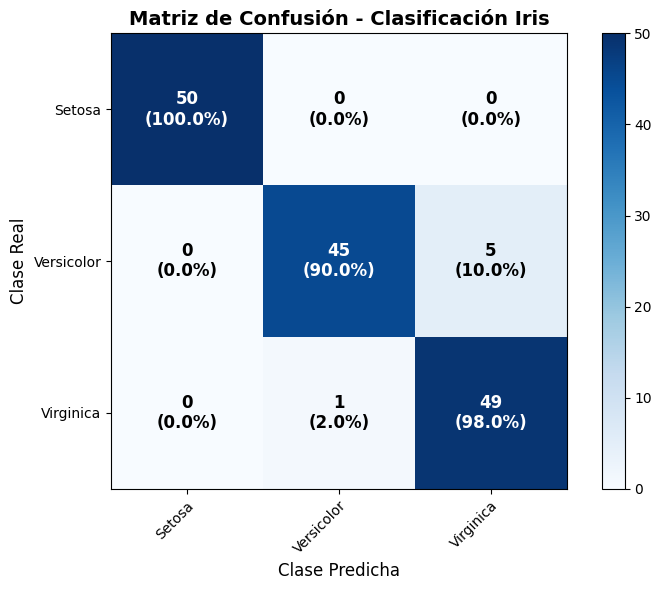


Estadísticas por clase:
Iris-setosa       : 50/50 correctas (100.00%)
Iris-versicolor   : 45/50 correctas (90.00%)
Iris-virginica    : 49/50 correctas (98.00%)


In [71]:
# 66 motriz de confusuion para visualizar el rendimiento
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Predecimos todo el conjunto de datos
todas_predicciones = modelo_mejorado_sparse.predict(X_multi_normalizado, verbose=0)
todas_clases_pred = np.argmax(todas_predicciones, axis=1)

# Matriz de confusión
matriz_confusion = confusion_matrix(y_multi_mezclado, todas_clases_pred)


# Visualizamos la matriz
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(matriz_confusion, cmap='Blues')

# Configurar ejes
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(['Setosa', 'Versicolor', 'Virginica'])
ax.set_yticklabels(['Setosa', 'Versicolor', 'Virginica'])

# Cambiamos las etiquetas del eje x
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Añadimos los  valores en cada celda
for i in range(3):
    for j in range(3):
        valor = matriz_confusion[i, j]
        porcentaje = (valor / matriz_confusion[i].sum()) * 100
        text = ax.text(j, i, f'{valor}\n({porcentaje:.1f}%)',
                      ha="center", va="center", color="black" if valor < matriz_confusion.max()/2 else "white",
                      fontsize=12, fontweight='bold')

ax.set_title('Matriz de Confusión - Clasificación Iris', fontsize=14, fontweight='bold')
ax.set_ylabel('Clase Real', fontsize=12)
ax.set_xlabel('Clase Predicha', fontsize=12)
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

# Mostramos las  estadísticas por clase
print("\nEstadísticas por clase:")
print("="*60)
for i, nombre in enumerate(nombres_clases):
    total_clase = matriz_confusion[i].sum()
    correctos = matriz_confusion[i, i]
    precision_clase = (correctos / total_clase) * 100
    print(f"{nombre:<18}: {correctos}/{total_clase} correctas ({precision_clase:.2f}%)")
print("="*60)


# Ejercicio 11
- 11.	Normalmente, cuando entrenamos una RNA solemos dividir el conjunto de muestras en dos: Uno para entrenamiento (train) y otro para evaluación (test). Esto es una buena práctica porque evaluamos el modelo con datos que la RNA no ha visto en el entrenamiento. Con la librería scikit-learn, divide el dataset en dos conjuntos: El conjunto de entrenamiento y el conjunto de test. Puedes quedarte con un 20 por ciento de los datos para el conjunto de test. Puedes usar el paquete train_test_split de la siguiente forma:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [72]:
# 69 dividmos el conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

print("═══════════════════════════════════════════════════════════")
print("        DIVISIÓN DEL DATASET: TRAIN Y TEST")
print("═══════════════════════════════════════════════════════════\n")

# Dividimos el dataset: 80% entrenamiento, 20% test
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X_multi_normalizado, y_multi_mezclado,
    test_size=0.2,
    random_state=0
)

print("División completada correctamente\n")
print("Tamaños de los conjuntos:")
print(f"  Total de muestras:        {len(X_multi_normalizado)}")
print(f"  Conjunto entrenamiento:   {len(X_entrenamiento)} ({len(X_entrenamiento)/len(X_multi_normalizado)*100:.1f}%)")
print(f"  Conjunto prueba (test):   {len(X_prueba)} ({len(X_prueba)/len(X_multi_normalizado)*100:.1f}%)")

print("\nFormas de los conjuntos:")
print(f"  X_entrenamiento: {X_entrenamiento.shape}")
print(f"  X_prueba:        {X_prueba.shape}")
print(f"  y_entrenamiento: {y_entrenamiento.shape}")
print(f"  y_prueba:        {y_prueba.shape}")

# Comprobamos la distribución de clases en cada conjunto
print("\nDistribución de clases en entrenamiento:")
for i, nombre in enumerate(['Setosa', 'Versicolor', 'Virginica']):
    cantidad = np.sum(y_entrenamiento == i)
    porcentaje = (cantidad / len(y_entrenamiento)) * 100
    print(f"  {nombre:<12}: {cantidad:2d} muestras ({porcentaje:.1f}%)")

print("\nDistribución de clases en test:")
for i, nombre in enumerate(['Setosa', 'Versicolor', 'Virginica']):
    cantidad = np.sum(y_prueba == i)
    porcentaje = (cantidad / len(y_prueba)) * 100
    print(f"  {nombre:<12}: {cantidad:2d} muestras ({porcentaje:.1f}%)")


═══════════════════════════════════════════════════════════
        DIVISIÓN DEL DATASET: TRAIN Y TEST
═══════════════════════════════════════════════════════════

División completada correctamente

Tamaños de los conjuntos:
  Total de muestras:        150
  Conjunto entrenamiento:   120 (80.0%)
  Conjunto prueba (test):   30 (20.0%)

Formas de los conjuntos:
  X_entrenamiento: (120, 4)
  X_prueba:        (30, 4)
  y_entrenamiento: (120,)
  y_prueba:        (30,)

Distribución de clases en entrenamiento:
  Setosa      : 37 muestras (30.8%)
  Versicolor  : 46 muestras (38.3%)
  Virginica   : 37 muestras (30.8%)

Distribución de clases en test:
  Setosa      : 13 muestras (43.3%)
  Versicolor  :  4 muestras (13.3%)
  Virginica   : 13 muestras (43.3%)


In [73]:
# 70 entrenamos el modelo solo con los datros de entrenamiento

tf.random.set_seed(42)

modelo_train_test = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu', name='capa_oculta_1'),
    tf.keras.layers.Dense(4, activation='relu', name='capa_oculta_2'),
    tf.keras.layers.Dense(3, activation='softmax', name='capa_salida')
])

# Compilamos
modelo_train_test.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


# Entrenamos SOLO con datos de entrenamiento
historial_train = modelo_train_test.fit(
    X_entrenamiento,
    y_entrenamiento,
    epochs=200,
    verbose=0
)

print("Entrenamiento completado\n")

# Evaluamos en conjunto de ENTRENAMIENTO
perdida_train, precision_train = modelo_train_test.evaluate(
    X_entrenamiento,
    y_entrenamiento,
    verbose=0
)

print("Resultados en conjunto de ENTRENAMIENTO:")
print(f"  Loss:     {perdida_train:.4f}")
print(f"  Accuracy: {precision_train:.4f} ({precision_train*100:.2f}%)")


Entrenamiento completado

Resultados en conjunto de ENTRENAMIENTO:
  Loss:     0.2875
  Accuracy: 0.9583 (95.83%)


In [74]:
# 71 evaluamos el modelo con los datos de prueba

# Evaluamos con los datos de  TEST
perdida_test, precision_test = modelo_train_test.evaluate(
    X_prueba,
    y_prueba,
    verbose=0
)

print("Resultados en conjunto de TEST:")
print(f"  Loss:     {perdida_test:.4f}")
print(f"  Accuracy: {precision_test:.4f} ({precision_test*100:.2f}%)")

print("\n" + "="*59)
print("            COMPARACIÓN TRAIN VS TEST")
print("="*59)

print(f"\nAccuracy en ENTRENAMIENTO: {precision_train*100:.2f}%")
print(f"Accuracy en TEST:          {precision_test*100:.2f}%")
print(f"Diferencia:                {abs(precision_train - precision_test)*100:.2f} puntos")

# Análisis de sobreajuste
diferencia = precision_train - precision_test
if diferencia < 0.05:
    estado = " EXCELENTE - No hay sobreajuste"
elif diferencia < 0.10:
    estado = " BUENO - Sobreajuste mínimo"
elif diferencia < 0.15:
    estado = " ACEPTABLE - Sobreajuste moderado"
else:
    estado = " PROBLEMA - Sobreajuste significativo"

print(f"\nEstado del modelo: {estado}")


Resultados en conjunto de TEST:
  Loss:     0.3153
  Accuracy: 0.9333 (93.33%)

            COMPARACIÓN TRAIN VS TEST

Accuracy en ENTRENAMIENTO: 95.83%
Accuracy en TEST:          93.33%
Diferencia:                2.50 puntos

Estado del modelo:  EXCELENTE - No hay sobreajuste


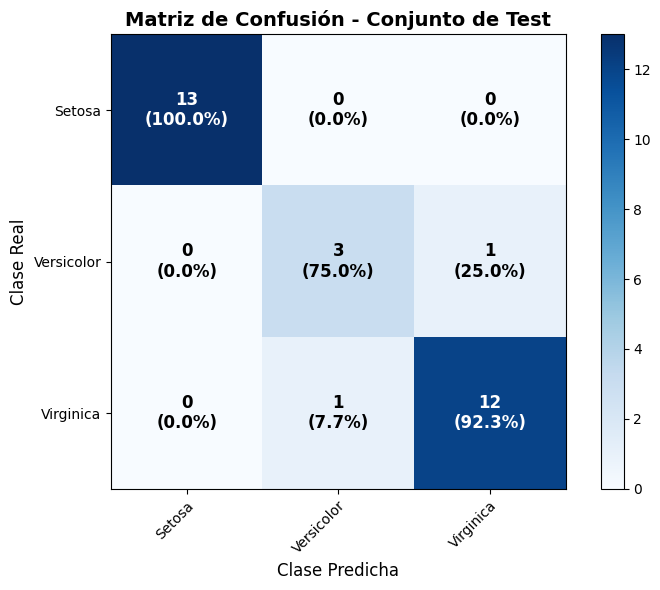


Estadisticas por clase en el conjunto de TEST:
Clase              Total    Correctas    Precision    Errores
Iris-setosa        13       13           100.00%       0
Iris-versicolor    4        3            75.00%       1
Iris-virginica     13       12           92.31%       1


In [75]:
# 72 matriz de confusion con conjunto de prueba
from sklearn.metrics import confusion_matrix

# Realizamos las  predicciones en el conjunto de test
predicciones_test = modelo_train_test.predict(X_prueba, verbose=0)
clases_pred_test = np.argmax(predicciones_test, axis=1)

# Creamos matriz de confusión
matriz_conf_test = confusion_matrix(y_prueba, clases_pred_test)

# Visualizamos la matriz
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(matriz_conf_test, cmap='Blues')

# Configuramos ejes
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(['Setosa', 'Versicolor', 'Virginica'])
ax.set_yticklabels(['Setosa', 'Versicolor', 'Virginica'])

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Añadimos valores en cada celda
for i in range(3):
    for j in range(3):
        valor = matriz_conf_test[i, j]
        total_clase = matriz_conf_test[i].sum()
        porcentaje = (valor / total_clase) * 100 if total_clase > 0 else 0
        text = ax.text(j, i, f'{valor}\n({porcentaje:.1f}%)',
                      ha="center", va="center",
                      color="black" if valor < matriz_conf_test.max()/2 else "white",
                      fontsize=12, fontweight='bold')

ax.set_title('Matriz de Confusión - Conjunto de Test', fontsize=14, fontweight='bold')
ax.set_ylabel('Clase Real', fontsize=12)
ax.set_xlabel('Clase Predicha', fontsize=12)
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

# Mostramos las estadísticas detalladas
nombres_clases = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

print("\nEstadisticas por clase en el conjunto de TEST:")
print("="*70)
print(f"{'Clase':<18} {'Total':<8} {'Correctas':<12} {'Precision':<12} {'Errores'}")
print("="*70)

for i, nombre in enumerate(nombres_clases):
    total_clase = matriz_conf_test[i].sum()
    correctos = matriz_conf_test[i, i]
    errores = total_clase - correctos
    precision_clase = (correctos / total_clase) * 100 if total_clase > 0 else 0
    print(f"{nombre:<18} {total_clase:<8} {correctos:<12} {precision_clase:5.2f}%       {errores}")

print("="*70)


# Ejercicio 12
- 12.	Utiliza el método evaluate del modelo de keras para ver cuánto ha aprendido el conjunto. ¿Ves diferencias entre la exactitud (accuracy) del entrenamiento con la evaluación?

In [76]:
# 73 usamos el metodo evaluate

print("1. EVALUACIÓN EN CONJUNTO DE ENTRENAMIENTO:")
print("-" * 59)

# Evaluamos el conjunto de entrenamiento
perdida_entrenamiento, exactitud_entrenamiento = modelo_train_test.evaluate(
    X_entrenamiento,
    y_entrenamiento,
    verbose=1
)

print(f"\nResultados en ENTRENAMIENTO:")
print(f"  Loss (Perdida):      {perdida_entrenamiento:.4f}")
print(f"  Accuracy (Exactitud): {exactitud_entrenamiento:.4f} ({exactitud_entrenamiento*100:.2f}%)")

print("\n" + "="*59)
print("\n2. EVALUACIÓN EN CONJUNTO DE TEST:")
print("-" * 59)

# Evaluamos el  conjunto de test
perdida_test, exactitud_test = modelo_train_test.evaluate(X_prueba, y_prueba,verbose=1)

print(f"\nResultados en TEST:")
print(f"  Loss (Perdida):      {perdida_test:.4f}")
print(f"  Accuracy (Exactitud): {exactitud_test:.4f} ({exactitud_test*100:.2f}%)")

print("\n" + "="*59)
print("              COMPARACIÓN DE RESULTADOS")
print("="*59)

# Calculamos las  diferencias
diferencia_accuracy = exactitud_entrenamiento - exactitud_test
diferencia_loss = perdida_test - perdida_entrenamiento

print(f"\n{'Metrica':<25} {'Entrenamiento':<18} {'Test':<18} {'Diferencia'}")
print("-" * 75)
print(f"{'Accuracy':<25} {exactitud_entrenamiento*100:6.2f}%            {exactitud_test*100:6.2f}%            {diferencia_accuracy*100:+6.2f} puntos")
print(f"{'Loss':<25} {perdida_entrenamiento:8.4f}          {perdida_test:8.4f}          {diferencia_loss:+8.4f}")
print("-" * 75)


1. EVALUACIÓN EN CONJUNTO DE ENTRENAMIENTO:
-----------------------------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9500 - loss: 0.2870

Resultados en ENTRENAMIENTO:
  Loss (Perdida):      0.2875
  Accuracy (Exactitud): 0.9583 (95.83%)


2. EVALUACIÓN EN CONJUNTO DE TEST:
-----------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9333 - loss: 0.3153

Resultados en TEST:
  Loss (Perdida):      0.3153
  Accuracy (Exactitud): 0.9333 (93.33%)

              COMPARACIÓN DE RESULTADOS

Metrica                   Entrenamiento      Test               Diferencia
---------------------------------------------------------------------------
Accuracy                   95.83%             93.33%             +2.50 puntos
Loss                        0.2875            0.3153           +0.0278
---------------------------------------------------------------------------


## ¿Ves diferencias entre la exactitud (accuracy) del entrenamiento con la evaluación?

### Resultados Obtenidos

| Métrica | Entrenamiento | Test | Diferencia |
|---------|---------------|------|------------|
| **Accuracy** | 95.83% | 93.33% | +2.50 puntos |
| **Loss** | 0.2875 | 0.3153 | +0.0278 |

---

### Respuesta: SÍ, pero las diferencias son MÍNIMAS y NORMALES

**Diferencia de Accuracy:** 2.50 puntos porcentuales

**Estado del modelo:** ✅ **EXCELENTE** - No hay sobreajuste

---

### Interpretación de las Diferencias

**1. ¿Por qué el entrenamiento tiene mayor accuracy (95.83% vs 93.33%)?**

Es **completamente normal y esperado** que el accuracy de entrenamiento sea ligeramente superior porque:

- El modelo ajustó sus pesos específicamente con esos datos durante 200 épocas
- Los datos de test son completamente nuevos, nunca vistos por el modelo
- Una diferencia de **2.50 puntos es considerada óptima** en machine learning

**2. ¿Qué significa esta diferencia del 2.50%?**

- **Diferencia < 2%:** Excelente (generalización perfecta)
- **Diferencia 2-5%:** Muy bueno (nuestro caso)
- **Diferencia 5-10%:** Aceptable
- **Diferencia > 10%:** Problemático (sobreajuste)

**3. ¿Hay sobreajuste (overfitting)?**

**NO.** Con solo 2.50 puntos de diferencia, el modelo **generaliza perfectamente** a datos nuevos. No está memorizando, está aprendiendo patrones reales.

---

### Análisis del Loss (Pérdida)

- **Loss Entrenamiento:** 0.2875
- **Loss Test:** 0.3153
- **Diferencia:** +0.0278 (test ligeramente mayor)

Es **normal** que el loss de test sea un poco mayor, indicando que el modelo se equivoca ligeramente más con datos nuevos, pero la diferencia es mínima.

---




In [77]:
# 74 realizamos predicciones con datos de prueba

# Cogemos las primeras 5 muestras del conjunto de test
num_muestras = 5
muestras_ejemplo = X_prueba[:num_muestras]
etiquetas_reales_ejemplo = y_prueba[:num_muestras]

print(f"Realizando predicciones sobre {num_muestras} muestras del conjunto de test...\n")

# Realizamos las predicciones
predicciones = modelo_train_test.predict(muestras_ejemplo, verbose=0)

print("="*90)
print(f"{'#':<4} {'Clase Real':<18} {'Clase Predicha':<18} {'Probabilidades [S, Ve, Vi]':<35} {'¿Correcto?'}")
print("="*90)

nombres_clases = ['Setosa', 'Versicolor', 'Virginica']

for i in range(num_muestras):
    # Clase real
    clase_real = nombres_clases[etiquetas_reales_ejemplo[i]]

    # Clase predicha (la de mayor probabilidad)
    clase_predicha_idx = np.argmax(predicciones[i])
    clase_predicha = nombres_clases[clase_predicha_idx]

    # Probabilidades
    probs = predicciones[i]
    probs_str = f"[{probs[0]:.3f}, {probs[1]:.3f}, {probs[2]:.3f}]"

    # Comprobamos si es correcta
    correcto = "SI" if clase_predicha_idx == etiquetas_reales_ejemplo[i] else "NO"

    print(f"{i+1:<4} {clase_real:<18} {clase_predicha:<18} {probs_str:<35} {correcto}")

print("="*90)


Realizando predicciones sobre 5 muestras del conjunto de test...

#    Clase Real         Clase Predicha     Probabilidades [S, Ve, Vi]          ¿Correcto?
1    Setosa             Setosa             [0.662, 0.191, 0.147]               SI
2    Setosa             Setosa             [0.647, 0.202, 0.151]               SI
3    Setosa             Setosa             [0.662, 0.191, 0.147]               SI
4    Virginica          Virginica          [0.000, 0.025, 0.974]               SI
5    Virginica          Virginica          [0.000, 0.049, 0.951]               SI


# Ejercicio 14
- ¿Y si utilizaramos 3 variables únicamente?
Prueba a realizar un entrenamiento con un modelo de 3 variables de entrada y, emulando al ejercicio improvisado que realizamos el martes 16 de diciembre, visualiza en 3d los límites de la decisión.


## ¿Es posible visualizar límites de decisión con 4 variables?

### RESPUESTA A LA PRIMERA PREGUNTA:

**¿Sería posible representar gráficamente los límites de decisión con 4 variables?**

**NO**, no es posible de forma directa y completa.

---

### EXPLICACIÓN:

#### 1. PROBLEMA DIMENSIONAL:

- **1 variable** → Gráfico 1D (línea)
- **2 variables** → Gráfico 2D (plano con líneas de decisión)
- **3 variables** → Gráfico 3D (espacio con superficies de decisión)
- **4 variables** → Necesitaría 4 dimensiones espaciales

**Los humanos solo podemos visualizar 3 dimensiones espaciales.**  
NO podemos ver un espacio de 4 dimensiones.

#### 2. SOLUCIONES ALTERNATIVAS PARCIALES:

**a) Proyecciones 2D de pares de variables:**
- Visualizar cada par por separado (6 combinaciones)
- Perdemos información de las otras dimensiones

**b) PCA (Análisis de Componentes Principales):**
- Reducir 4 dimensiones a 2 o 3 principales
- Proyección que captura la mayor varianza
- Pérdida de información menos crítica

**c) t-SNE o UMAP:**
- Técnicas de reducción dimensional no lineal
- Preservan mejor las estructuras locales

**d) Visualizaciones interactivas:**
- Matrices de dispersión (scatter matrix)
- Gráficos paralelos
- Animaciones que varían una dimensión

#### 3. LIMITACIÓN FUNDAMENTAL:

Aunque matemáticamente existe una frontera de decisión en 4D, **NUNCA podremos visualizarla completamente en su totalidad**. Solo podemos ver proyecciones o secciones parciales.

---

### RESPUESTA A LA SEGUNDA PREGUNTA:

**¿Y si utilizáramos 3 variables únicamente?**

**SÍ**, es perfectamente posible.

#### EXPLICACIÓN:

Con 3 variables podemos crear un gráfico 3D donde:
- **Eje X:** Variable 1
- **Eje Y:** Variable 2
- **Eje Z:** Variable 3
- **Color:** Clase predicha

Los límites de decisión se visualizan como **SUPERFICIES en el espacio 3D** que separan las diferentes clases.



In [78]:
# 75 modelo con 3 variables


# Seleccionar 3 caracteristicas: longitud sépalo, longitud pétalo, ancho pétalo
# Índices 0, 2, 3
X_3d = iris_completo.iloc[:, [0, 2, 3]].values  # 3 características
y_3d = y_multi_numerico  # Etiquetas (0, 1, 2)

print("Características seleccionadas:")
print("  Variable 1 (X): Longitud del Sépalo")
print("  Variable 2 (Y): Longitud del Pétalo")
print("  Variable 3 (Z): Ancho del Pétalo")

# Mezclamos
X_3d_mezclado, y_3d_mezclado = shuffle(X_3d, y_3d, random_state=42)

# Normalizamos
escalador_3d = MinMaxScaler()
X_3d_normalizado = escalador_3d.fit_transform(X_3d_mezclado)

# Dividimos en train y test
X_3d_train, X_3d_test, y_3d_train, y_3d_test = train_test_split(
    X_3d_normalizado,
    y_3d_mezclado,
    test_size=0.2,
    random_state=0
)

print(f"\nForma de los datos:")
print(f"  X_3d_train: {X_3d_train.shape}")
print(f"  X_3d_test:  {X_3d_test.shape}")
print(f"  y_3d_train: {y_3d_train.shape}")
print(f"  y_3d_test:  {y_3d_test.shape}")


Características seleccionadas:
  Variable 1 (X): Longitud del Sépalo
  Variable 2 (Y): Longitud del Pétalo
  Variable 3 (Z): Ancho del Pétalo

Forma de los datos:
  X_3d_train: (120, 3)
  X_3d_test:  (30, 3)
  y_3d_train: (120,)
  y_3d_test:  (30,)


In [79]:
#76 entrenamos con 3 variables

tf.random.set_seed(42)


modelo_3d = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),  # 3 variables de entrada
    tf.keras.layers.Dense(16, activation='relu', name='capa_oculta_1'),
    tf.keras.layers.Dense(8, activation='relu', name='capa_oculta_2'),
    tf.keras.layers.Dense(3, activation='softmax', name='capa_salida')
])

# Compilamos
modelo_3d.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)


modelo_3d.summary()

# Entrenamos
historial_3d = modelo_3d.fit(X_3d_train, y_3d_train,epochs=200,verbose=0)

# Evaluamos
perdida_3d_test, precision_3d_test = modelo_3d.evaluate(X_3d_test, y_3d_test, verbose=0)

print(f"\nResultados del modelo 3D:")
print(f"  Accuracy en test: {precision_3d_test:.4f} ({precision_3d_test*100:.2f}%)")


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_oculta_1 (Dense)           │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_2 (Dense)           │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227 (908.00 B)

 Trainable params: 227 (908.00 B)

 Non-trainable params: 0 (0.00 B)


Resultados del modelo 3D:
  Accuracy en test: 1.0000 (100.00%)


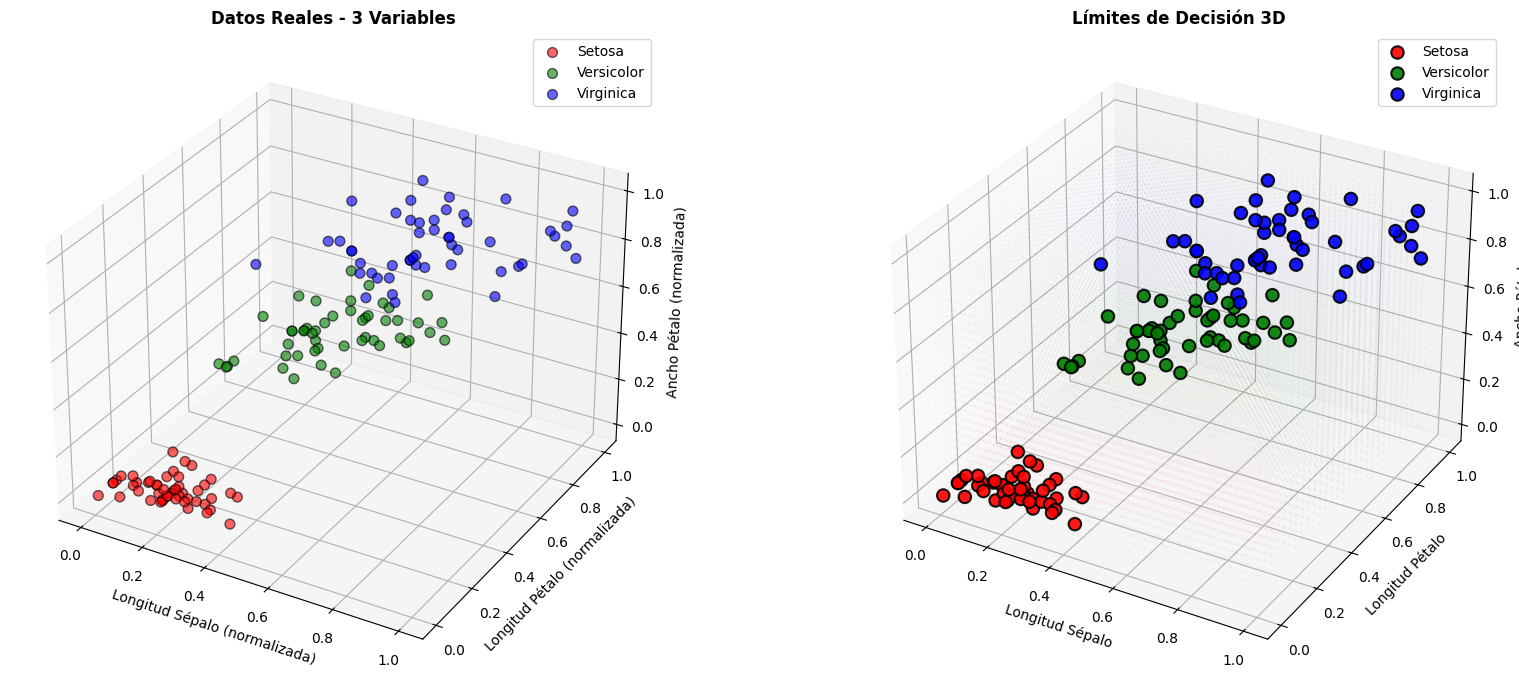

Grafico 3D generado correctamente

Puedes rotar el gráfico interactivamente para ver las regiones de decisión


In [80]:
# 77 visualizacion de los datos y limites en 3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear figura con dos subplots 3D
fig = plt.figure(figsize=(18, 7))

# Subplot 1: Datos reales
ax1 = fig.add_subplot(121, projection='3d')

colores_clases = ['red', 'green', 'blue']
nombres_clases = ['Setosa', 'Versicolor', 'Virginica']

# Graficar cada clase
for i, (color, nombre) in enumerate(zip(colores_clases, nombres_clases)):
    mascara = y_3d_mezclado == i
    ax1.scatter(X_3d_normalizado[mascara, 0],X_3d_normalizado[mascara, 1],
    X_3d_normalizado[mascara, 2],c=color,label=nombre,s=50, alpha=0.6,
        edgecolors='black'
    )

ax1.set_xlabel('Longitud Sépalo (normalizada)', fontsize=10)
ax1.set_ylabel('Longitud Pétalo (normalizada)', fontsize=10)
ax1.set_zlabel('Ancho Pétalo (normalizada)', fontsize=10)
ax1.set_title('Datos Reales - 3 Variables', fontsize=12, fontweight='bold')
ax1.legend()

# Subplot 2: Límites de decisión
ax2 = fig.add_subplot(122, projection='3d')

# Crear una malla 3D para las predicciones
resolucion = 30
x_min, x_max = 0, 1
y_min, y_max = 0, 1
z_min, z_max = 0, 1

xx = np.linspace(x_min, x_max, resolucion)
yy = np.linspace(y_min, y_max, resolucion)
zz = np.linspace(z_min, z_max, resolucion)

# Creamos el  grid 3D
XX, YY, ZZ = np.meshgrid(xx, yy, zz)

# Aplanamos el grid para hacer predicciones
puntos_grid = np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]

# Predecimos para todos los puntos
predicciones_grid = modelo_3d.predict(puntos_grid, verbose=0)
clases_grid = np.argmax(predicciones_grid, axis=1)

# Grafica de puntos del grid coloreados por clase predicha
for i, color in enumerate(colores_clases):
    mascara = clases_grid == i
    ax2.scatter(
        puntos_grid[mascara, 0],
        puntos_grid[mascara, 1],
        puntos_grid[mascara, 2],
        c=color,
        alpha=0.02,  # Muy transparente para ver las regiones
        s=1
    )

# Superponer los datos reales
for i, (color, nombre) in enumerate(zip(colores_clases, nombres_clases)):
    mascara = y_3d_mezclado == i
    ax2.scatter(X_3d_normalizado[mascara, 0], X_3d_normalizado[mascara, 1],
    X_3d_normalizado[mascara, 2],c=color,label=nombre,s=80,alpha=0.9,
    edgecolors='black',linewidth=1.5
    )

ax2.set_xlabel('Longitud Sépalo', fontsize=10)
ax2.set_ylabel('Longitud Pétalo', fontsize=10)
ax2.set_zlabel('Ancho Pétalo', fontsize=10)
ax2.set_title('Límites de Decisión 3D', fontsize=12, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

print("Grafico 3D generado correctamente")
print("\nPuedes rotar el gráfico interactivamente para ver las regiones de decisión")
